In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/sivakumar/Data Files/netflix.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
#checking the shape of the data
df.shape

(8807, 12)

In [5]:
#getting the Data types of values in our data
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
#getting basic overview of the data
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
#checking No. of Unique values in our data
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [8]:
#checking No. of Null values in our data
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
#Getting the Value count of each type of ratings
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [10]:
#Here we are un-nesetting the the data, creating the new line for each. 
#In this case we are doing for Director
c = df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_new = pd.DataFrame(c,index=df['title'])
df_new = df_new.stack()
df_new=pd.DataFrame(df_new.reset_index()) 
df_new.rename (columns={0 : 'Directors'}, inplace=True) 
df_new.drop(['level_1'],axis=1,inplace=True) 
df_new.head()

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [11]:
#Here we are un-nesetting the the data, creating the new line for each. 
#In this case we are doing for Cast
c2 = df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_new2 = pd.DataFrame(c2,index=df['title'])
df_new2 = df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index()) 
df_new2.rename (columns={0 : 'Actors'}, inplace=True) 
df_new2.drop(['level_1'],axis=1,inplace=True) 
df_new2.head()

,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [12]:
#Here we are un-nesetting the the data, creating the new line for each. 
#In this case we are doing for Listed_In
c2 = df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new3 = pd.DataFrame(c2,index=df['title'])
df_new3 = df_new3.stack()
df_new3=pd.DataFrame(df_new3.reset_index()) 
df_new3.rename (columns={0 : 'Genre'}, inplace=True) 
df_new3.drop(['level_1'],axis=1,inplace=True) 
df_new3.head()

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [13]:
#Here we are un-nesetting the the data, creating the new line for each. 
#In this case we are doing for Country
c2 = df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_new4 = pd.DataFrame(c2,index=df['title'])
df_new4 = df_new4.stack()
df_new4=pd.DataFrame(df_new4.reset_index()) 
df_new4.rename (columns={0 : 'Country'}, inplace=True) 
df_new4.drop(['level_1'],axis=1,inplace=True) 
df_new4.head()

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [14]:
#Now Merging all the Un-Merged Data
#Merging the data with Directors and Actors on Title 
df_new5 = df_new.merge(df_new2, on=['title'], how = 'inner')
#Merging the data with above merged data with Genre
df_new6 = df_new5.merge(df_new3, on=['title'], how = 'inner')
#Merging the data with above merged data with country
df_new = df_new6.merge(df_new4, on = ['title'], how = 'inner')
#Replacing the NaN values of Director and Actor
df_new['Actors'].replace(['nan'],['Unknown Actor'],inplace=True)
df_new['Directors'].replace(['nan'],['Unknown Directors'],inplace=True)
df_new['Country'].replace(['nan'],['UnKnown Country'],inplace=True)
df_new.head()

,title,Directors,Actors,Genre,Country
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa


In [15]:
df_final = df_new.merge(df[['show_id','type','title','date_added','release_year',
                           'rating','duration']], on=['title'], how='left')
df_final.head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [16]:
df_final.shape

(201991, 11)

In [17]:
df_final.isnull().sum()

title             0
Directors         0
Actors            0
Genre             0
Country           0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          3
dtype: int64

In [18]:
df_final.loc[df_final['duration'].isnull(),'duration']=df_final.loc[df_final['duration'].isnull(),'duration'].fillna(df_final['rating'])

In [19]:
df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']='NR'
df_final['rating'].fillna('NR',inplace=True)
df_final.isnull().sum()

title             0
Directors         0
Actors            0
Genre             0
Country           0
show_id           0
type              0
date_added      158
release_year      0
rating            0
duration          0
dtype: int64

In [20]:
df_final['rating'].value_counts()

TV-MA       73867
TV-14       43931
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1643
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: rating, dtype: int64

In [21]:
df_final[df_final['date_added'].isnull()].head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration
136893,A Young Doctor's Notebook and Other Stories,Unknown Directors,Daniel Radcliffe,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136894,A Young Doctor's Notebook and Other Stories,Unknown Directors,Daniel Radcliffe,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136895,A Young Doctor's Notebook and Other Stories,Unknown Directors,Daniel Radcliffe,TV Dramas,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136896,A Young Doctor's Notebook and Other Stories,Unknown Directors,Jon Hamm,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136897,A Young Doctor's Notebook and Other Stories,Unknown Directors,Jon Hamm,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons


In [22]:
for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
    im = df_final[df_final['release_year']==i]['date_added'].mode().values[0]
    df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(im)

In [23]:
df_final

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201987,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [24]:
df_final[df_final['duration'].isnull()].head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration


In [25]:
df_final['duration'] = df_final['duration'].str.replace(' min','')
df_final.head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [26]:
##creating the bins for duration because it is a continous variable
df_final['duration_copy']=df_final['duration'].copy()
df_final1 = df_final.copy()

In [27]:
df_final1.loc[df_final1['duration_copy'].str.contains('Season'),'duration_copy']=0
df_final1['duration_copy'] = df_final1['duration_copy'].astype('int')
df_final1.head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [28]:
df_final1['duration_copy'].describe()

count    201991.000000
mean         77.152789
std          52.269154
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: duration_copy, dtype: float64

/var/folders/2k/nqxlqww13nd99192zjdnsjc00000gn/T/ipykernel_4203/1638109463.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final1['duration_copy'], hist = True, kde =True,


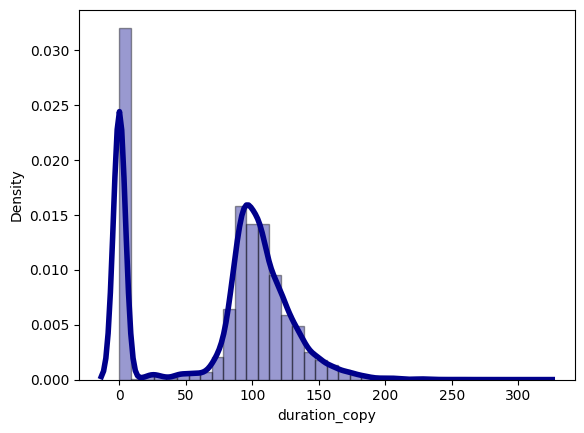

In [29]:
sns.distplot(df_final1['duration_copy'], hist = True, kde =True,
            bins=int(36), color = 'darkblue',
            hist_kws={'edgecolor': 'black'},
            kde_kws={'linewidth':4})
plt.show()

In [30]:
bins1 = [-1,1,50,80,100,120,150,200,315]
labels1 = ['<1', '1-50', '50-80', '80-100', '100-120', '120-150', '150-200', '200-315']
df_final1['duration_copy'] = pd.cut(df_final1['duration_copy'],bins=bins1, labels=labels1)
df_final1.head( )


,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,80-100
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1


In [31]:
df_final1.loc[~df_final1['duration'].str.contains('Season'),'duration']=df_final1.loc[~df_final1['duration'].str.contains('Season'),'duration_copy']
df_final1.drop(['duration_copy'],axis=1,inplace=True)
df_final1.head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [32]:
##Getting the month, week and year added
from datetime import datetime
from dateutil.parser import parse 
arr=[]
for i in df_final1['date_added' ].values:
    dt1=parse (i)
    arr.append(dt1.strftime('%Y-%m-%d'))
df_final1[ 'Modified_Added_date'] =arr
df_final1['Modified_Added_date']=pd.to_datetime(df_final1['Modified_Added_date'])
df_final1['month_added']=df_final1[ 'Modified_Added_date'].dt.month 
df_final1['week_Added']=df_final1['Modified_Added_date'].dt.week
df_final1['year']=df_final1['Modified_Added_date'].dt.year
df_final1.head( )

/var/folders/2k/nqxlqww13nd99192zjdnsjc00000gn/T/ipykernel_4203/3031150164.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_final1['week_Added']=df_final1['Modified_Added_date'].dt.week


,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


In [33]:
df_final1['title'] = df_final1['title'].str.replace(r"\(.*\)","")
df_final1.head()

/var/folders/2k/nqxlqww13nd99192zjdnsjc00000gn/T/ipykernel_4203/1303496868.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_final1['title'] = df_final1['title'].str.replace(r"\(.*\)","")


,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


In [34]:
df_final1.groupby(['Genre']).agg({'title':'unique'})

,title
Genre,
Action & Adventure,"[The Stronghold, Birth of the Dragon, Jaws, Ja..."
Anime Features,[InuYasha the Movie 2: The Castle Beyond the L...
Anime Series,"[Yowamushi Pedal, Pokémon Master Journeys: The..."
British TV Shows,"[The Great British Baking Show, Crime Stories:..."
Children & Family Movies,"[My Little Pony: A New Generation, Confessions..."
Classic & Cult TV,"[The Walking Dead, Okupas, A Perfect Day For A..."
Classic Movies,"[Jaws, Blade Runner: The Final Cut, Do the Rig..."
Comedies,"[The Starling, Confessions of an Invisible Gir..."
Crime TV Shows,"[Ganglands, Vendetta: Truth, Lies and The Mafi..."


In [35]:
df_final1.groupby(['Genre']).agg({'title':'nunique'})

,title
Genre,
Action & Adventure,854
Anime Features,71
Anime Series,176
British TV Shows,253
Children & Family Movies,639
Classic & Cult TV,28
Classic Movies,116
Comedies,1673
Crime TV Shows,470


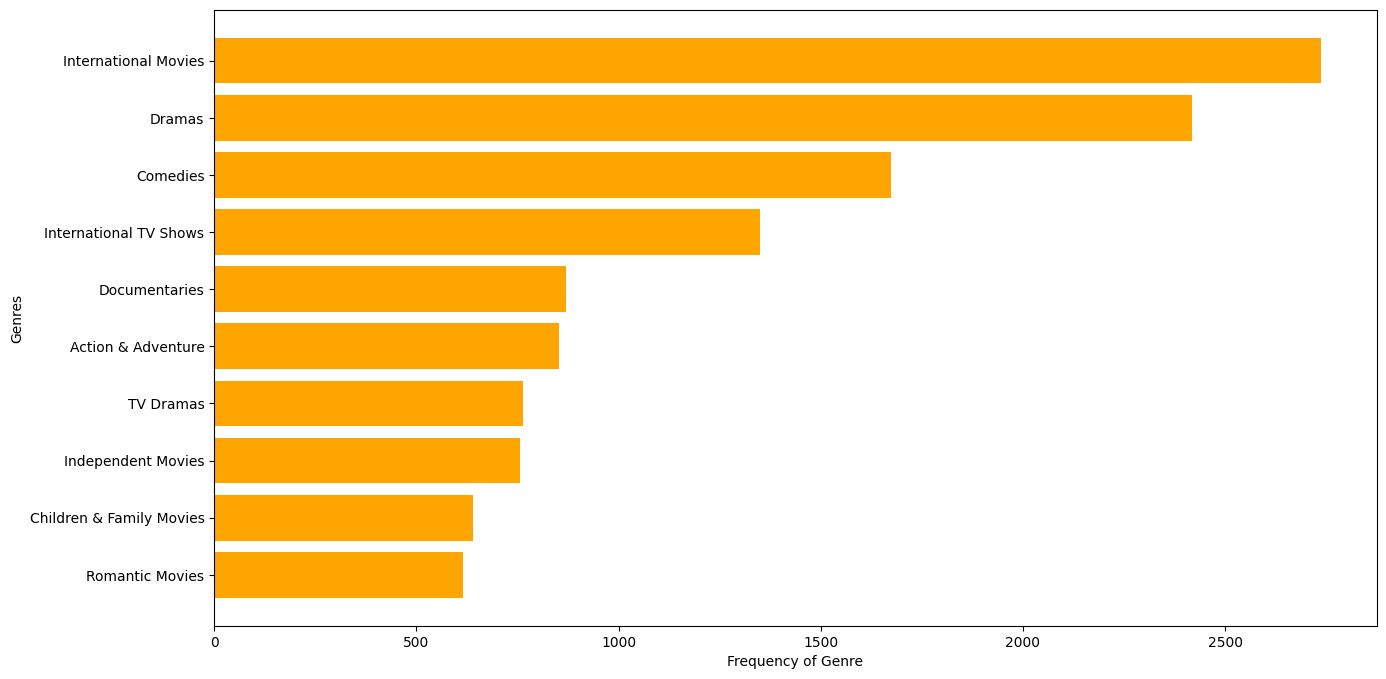

In [36]:
df_genre = df_final1.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'],df_genre[::-1]['title'], color=['orange'])
plt.xlabel('Frequency of Genre')
plt.ylabel('Genres')
plt.show()

International movies, Dramas are the more popular in Netflix

In [37]:
df_final1.groupby(['type']).agg({'title':'nunique'})

,title
type,
Movie,6115
TV Show,2676


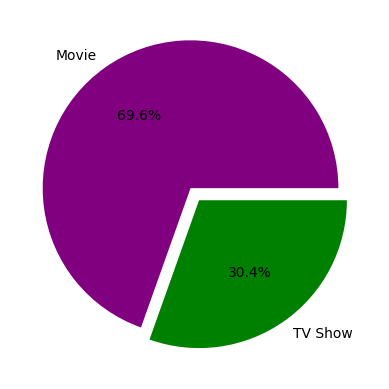

In [38]:
df_type = df_final1.groupby(['type']).agg({'title':'nunique'}).reset_index()
plt.pie(df_type['title'], explode=(0.05,0.05), labels=df_type['type'], colors=['purple','green'],autopct='%.1f%%')
plt.show()

70% of the data we have is Movies and 30% is shows

In [39]:
df_final1.groupby(['Country']).agg({'title':'nunique'})

,title
Country,
,2
Afghanistan,1
Albania,1
Algeria,3
Angola,1
...,...
Vatican City,1
Venezuela,4
Vietnam,7


In [40]:
df_final1['Country']=df_final1['Country'].str.replace(',', '')
df_final1.head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


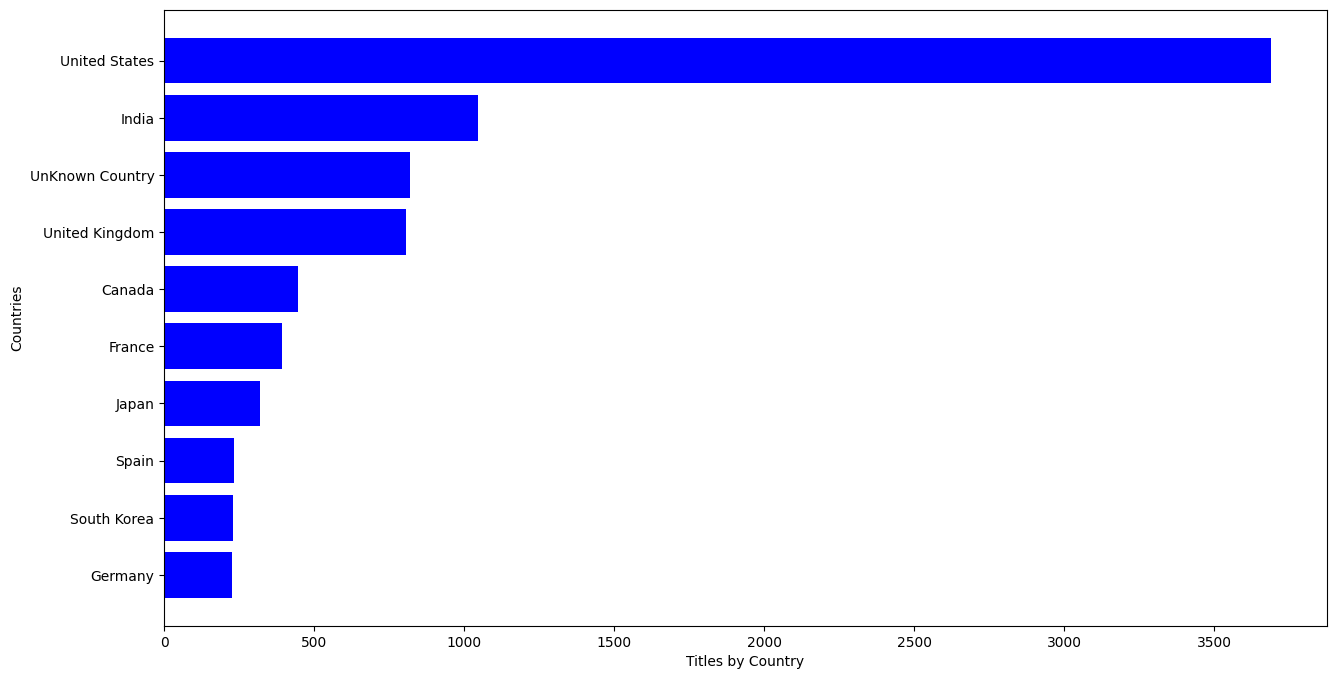

In [41]:
df_country = df_final1.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['Country'],df_country[::-1]['title'], color=['blue'])
plt.xlabel('Titles by Country')
plt.ylabel('Countries')
plt.show()

More No of movies released from USA and India

In [42]:
df_final1.groupby(['rating']).agg({'title':'nunique'})

,title
rating,
G,41
NC-17,3
NR,87
PG,287
PG-13,490
R,799
TV-14,2151
TV-G,220
TV-MA,3204


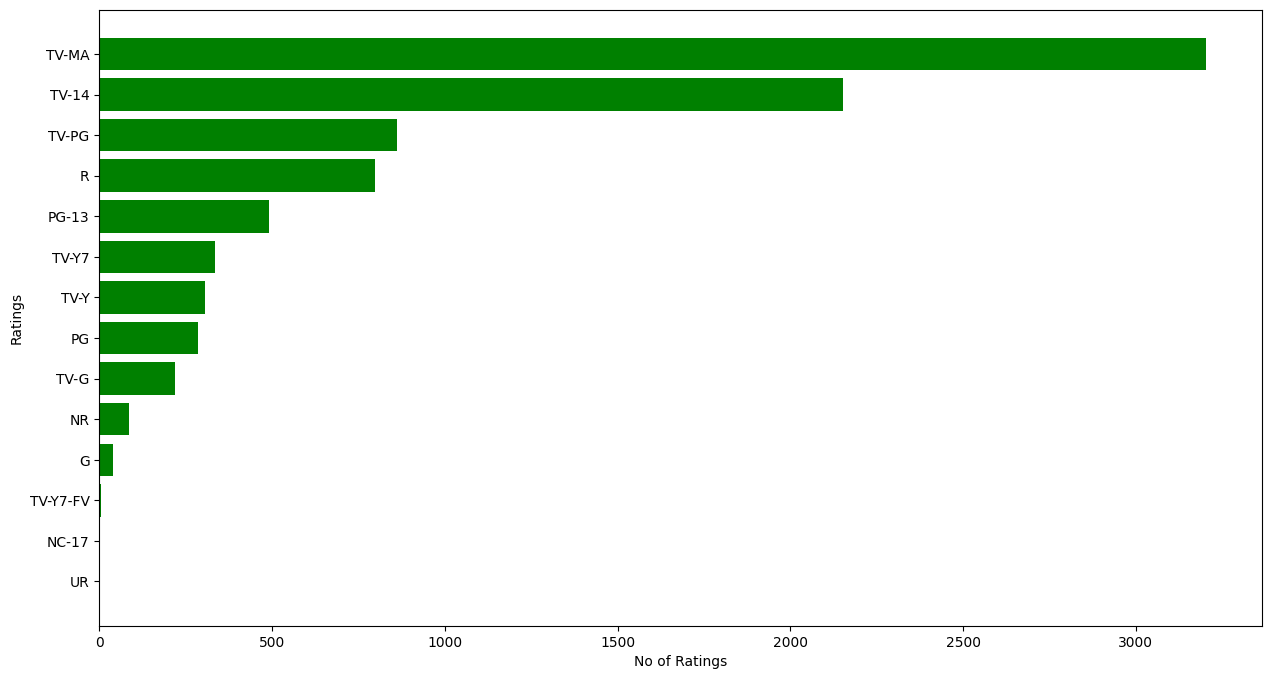

In [43]:
df_rating = df_final1.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'],df_rating[::-1]['title'], color=['green'])
plt.xlabel('No of Ratings')
plt.ylabel('Ratings')
plt.show()

Most of the movies in Netflix is for Mature Audiece and in next 14, PG are the movies with Parental Guidance

In [44]:
df_final1.groupby(['duration']).agg({'title':'nunique'})

,title
duration,
1 Season,1793
1-50,287
10 Seasons,7
100-120,1671
11 Seasons,2
12 Seasons,2
120-150,891
13 Seasons,3
15 Seasons,2


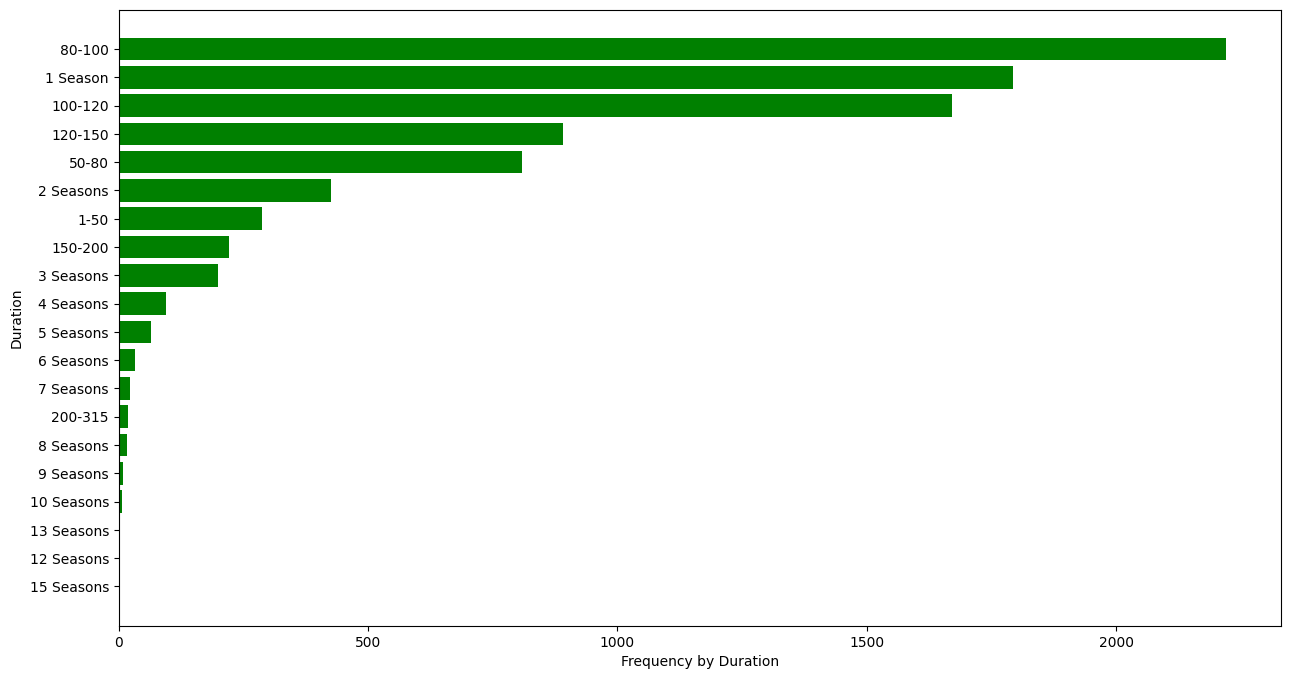

In [45]:
df_duration_copy = df_final1.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:20]
plt.figure(figsize=(15,8))
plt.barh(df_duration_copy[::-1]['duration'],df_duration_copy[::-1]['title'], color=['green'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Most watched movies in the duration of 80-100 mins and in shows most watched are the shows with less than 3 Seasons

In [46]:
df_final1['Actors']= df_final1['Actors'].str.replace('\$\$','')

/var/folders/2k/nqxlqww13nd99192zjdnsjc00000gn/T/ipykernel_4203/1775556756.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_final1['Actors']= df_final1['Actors'].str.replace('\$\$','')


In [47]:
df_final1.groupby(['Actors']).agg({'title':'nunique'})

,title
Actors,
Jr.,2
"""Riley"" Lakdhar Dridi",1
'Najite Dede,2
2 Chainz,1
2Mex,1
...,...
Şevket Çoruh,1
Şinasi Yurtsever,3
Şükran Ovalı,1


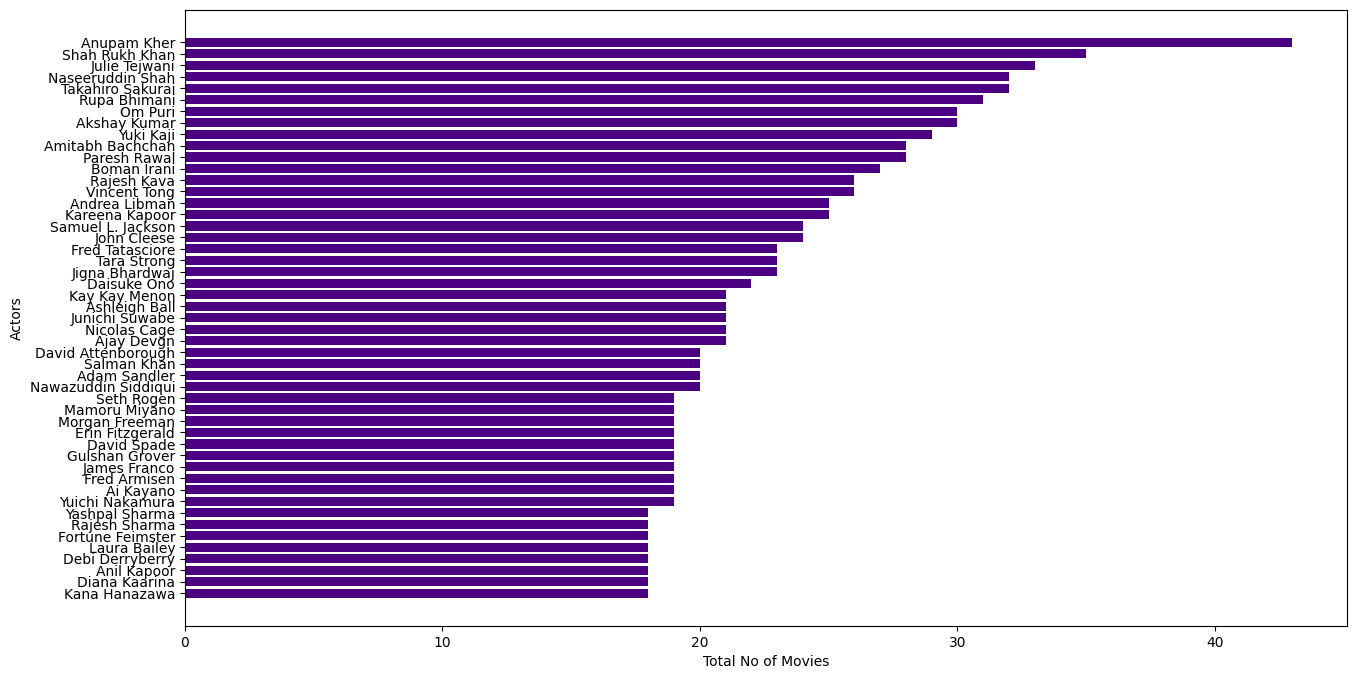

In [48]:
df_actors = df_final1.groupby(['Actors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:50]
df_actors=df_actors[df_actors['Actors'] != 'Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'],df_actors[::-1]['title'], color=['Indigo'])
plt.xlabel('Total No of Movies')
plt.ylabel('Actors')
plt.show()

Anupam Kher and Shah Rukh Khan are in movies which most watched on Netflix 

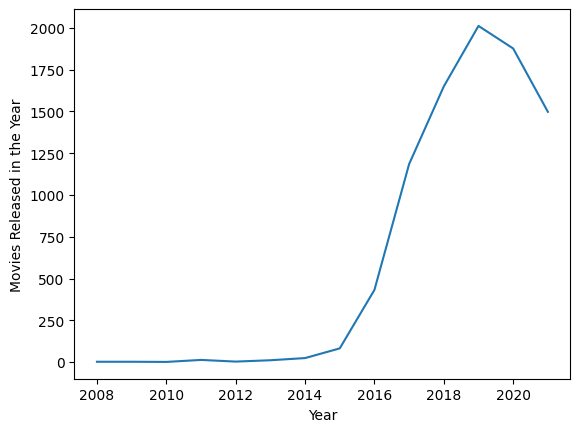

In [49]:
df_year = df_final1.groupby(['year']).agg({'title':'nunique'}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.xlabel('Year')
plt.ylabel('Movies Released in the Year')
plt.show()

Most of the movies released after 2015

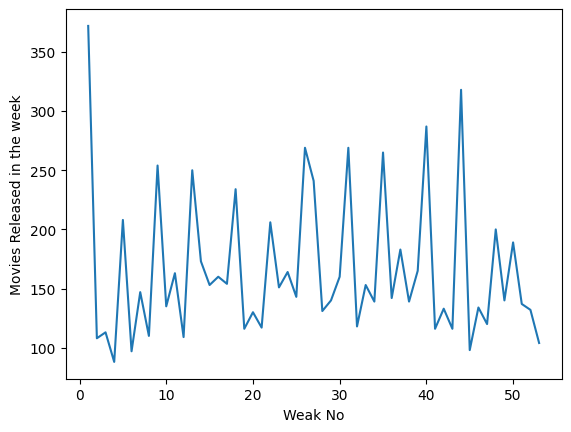

In [50]:
df_week = df_final1.groupby(['week_Added']).agg({'title':'nunique'}).reset_index()
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.xlabel('Weak No')
plt.ylabel('Movies Released in the week')
plt.show()

Most of the movies released in first weeks of year and in the last weeks of the november and start of the december

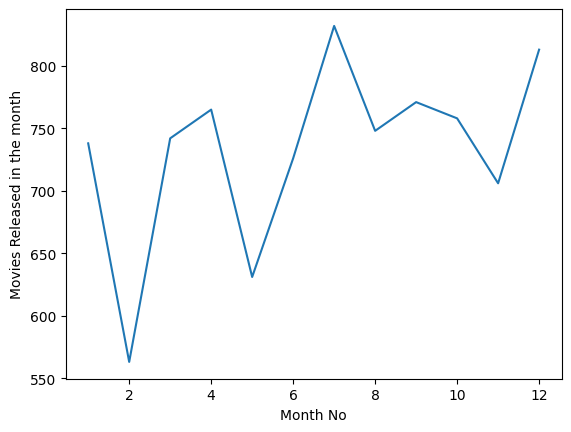

In [51]:
df_month = df_final1.groupby(['month_added']).agg({'title':'nunique'}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.xlabel('Month No')
plt.ylabel('Movies Released in the month')
plt.show()

There is a huge deep of movies released in February and May. In november month also we can see the deep in release of the movies

### Univariate Analysis for Shows and Movies

In [52]:
df_shows = df_final1[df_final1['type']=='TV Show']
df_movies = df_final1[df_final1['type']=='Movie']

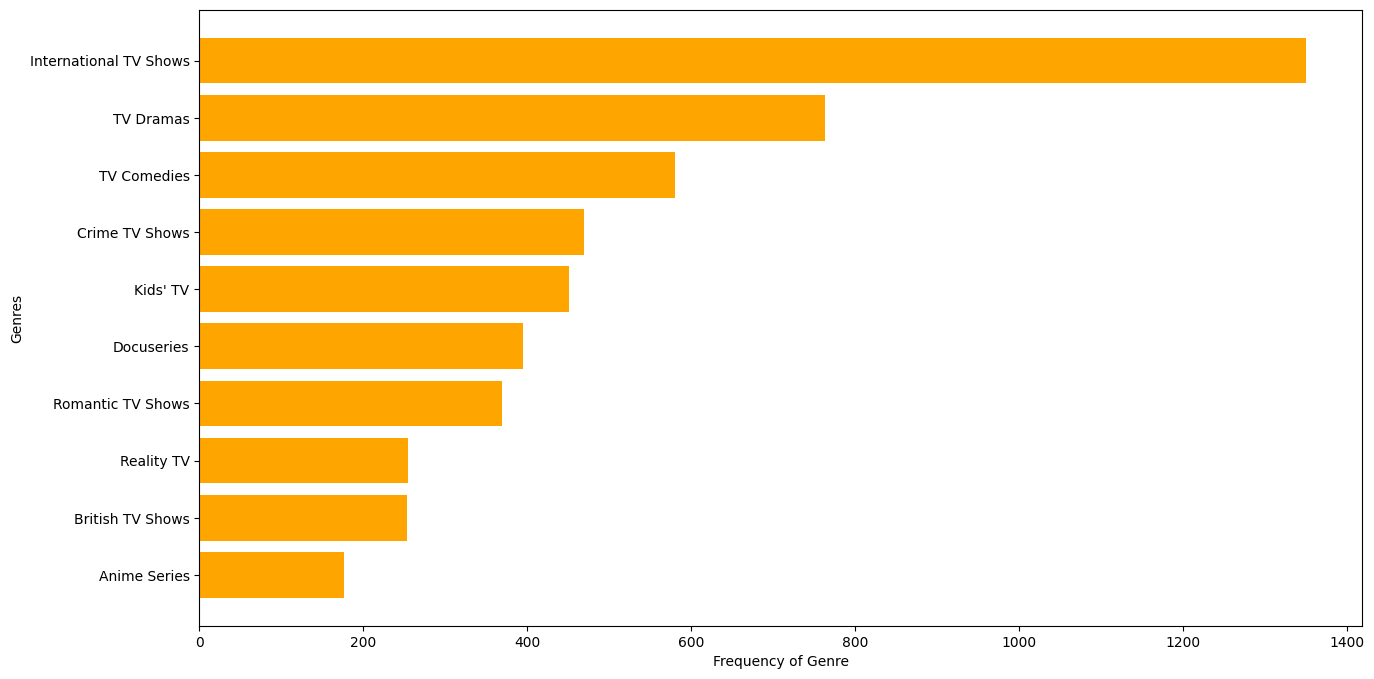

In [53]:
df_genre = df_shows.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'],df_genre[::-1]['title'], color=['orange'])
plt.xlabel('Frequency of Genre')
plt.ylabel('Genres')
plt.show()

International TV Shows, TV Dramas and TV Comedies are famous in TV shows in Netflix

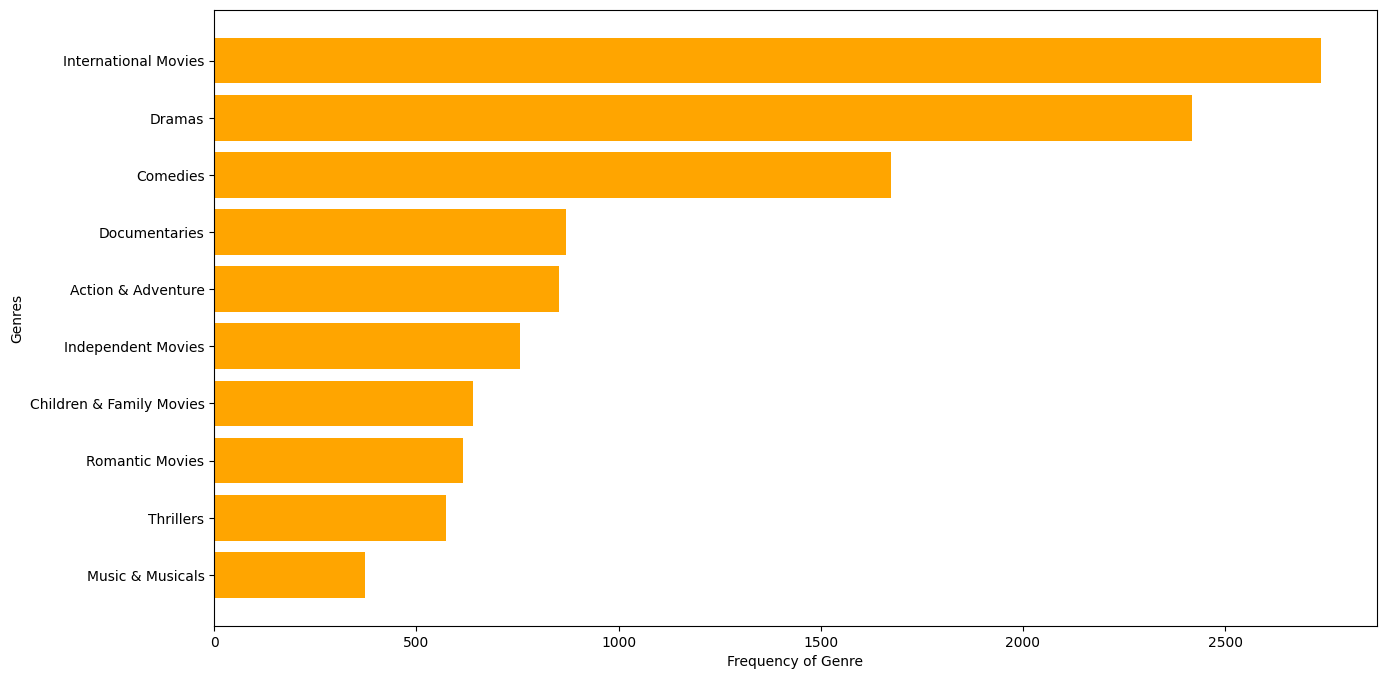

In [54]:
df_genre = df_movies.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'],df_genre[::-1]['title'], color=['orange'])
plt.xlabel('Frequency of Genre')
plt.ylabel('Genres')
plt.show()

International Movies, Dramas, Comedies are Famous in Movies section in Netflix

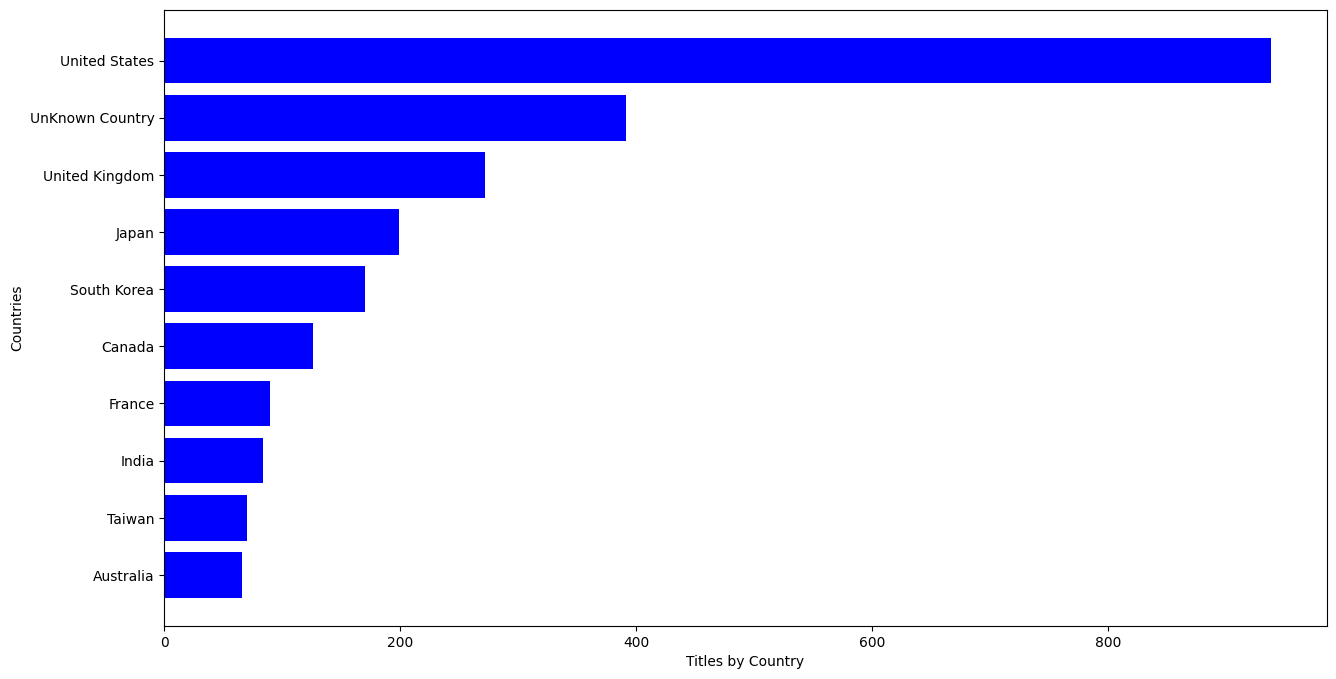

In [55]:
df_country = df_shows.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['Country'],df_country[::-1]['title'], color=['blue'])
plt.xlabel('Titles by Country')
plt.ylabel('Countries')
plt.show()

More No of Shows are From USA, UK

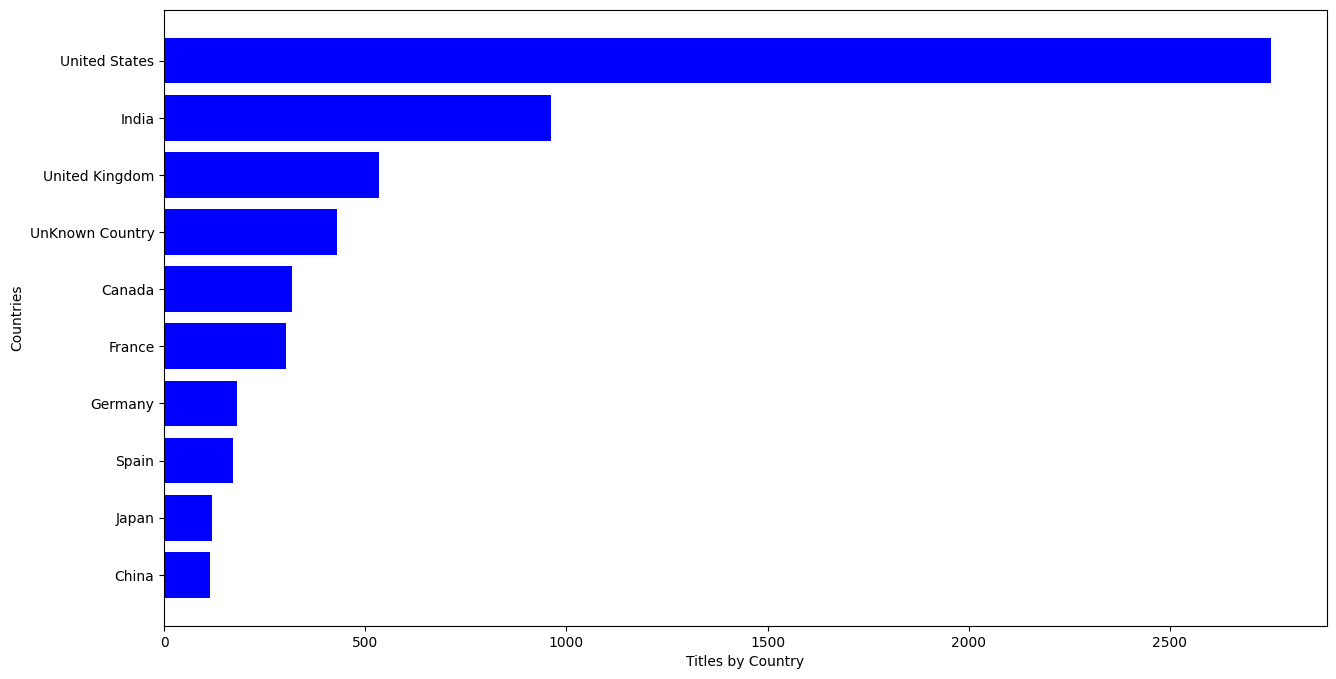

In [56]:
df_country = df_movies.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['Country'],df_country[::-1]['title'], color=['blue'])
plt.xlabel('Titles by Country')
plt.ylabel('Countries')
plt.show()

More No of Movies are form USA, India, UK

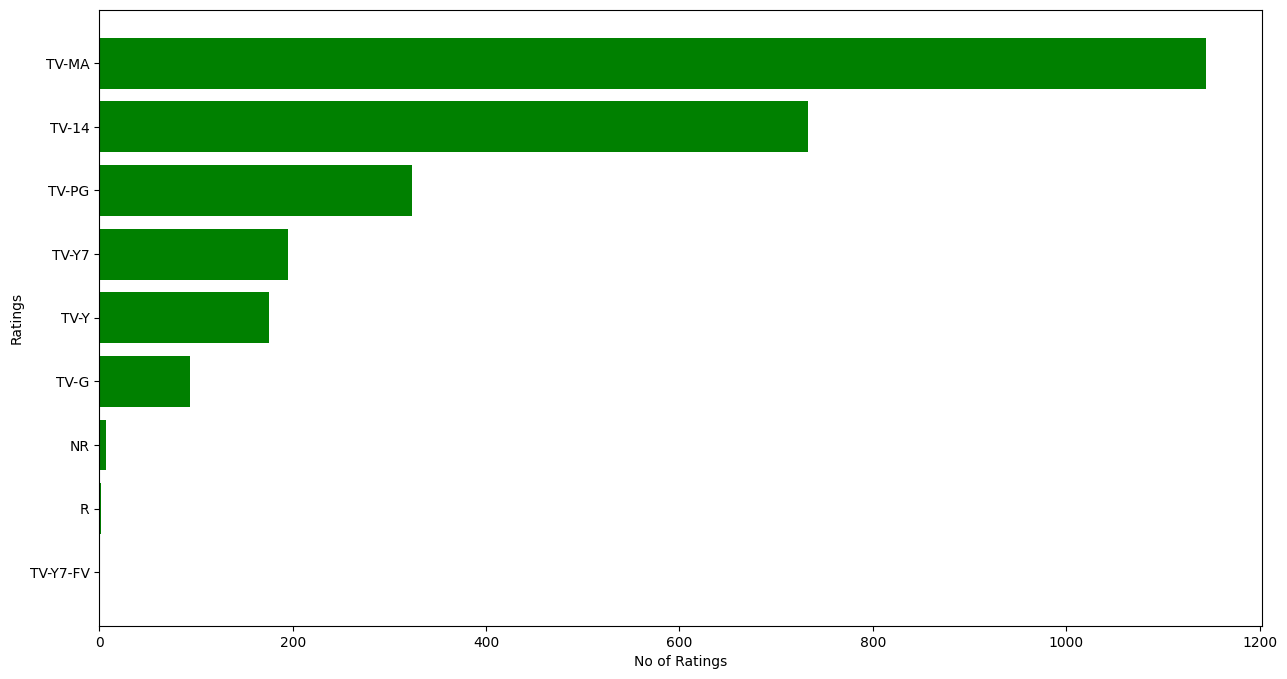

In [57]:
df_rating = df_shows.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'],df_rating[::-1]['title'], color=['green'])
plt.xlabel('No of Ratings')
plt.ylabel('Ratings')
plt.show()

Matured Content are more in the Netflix

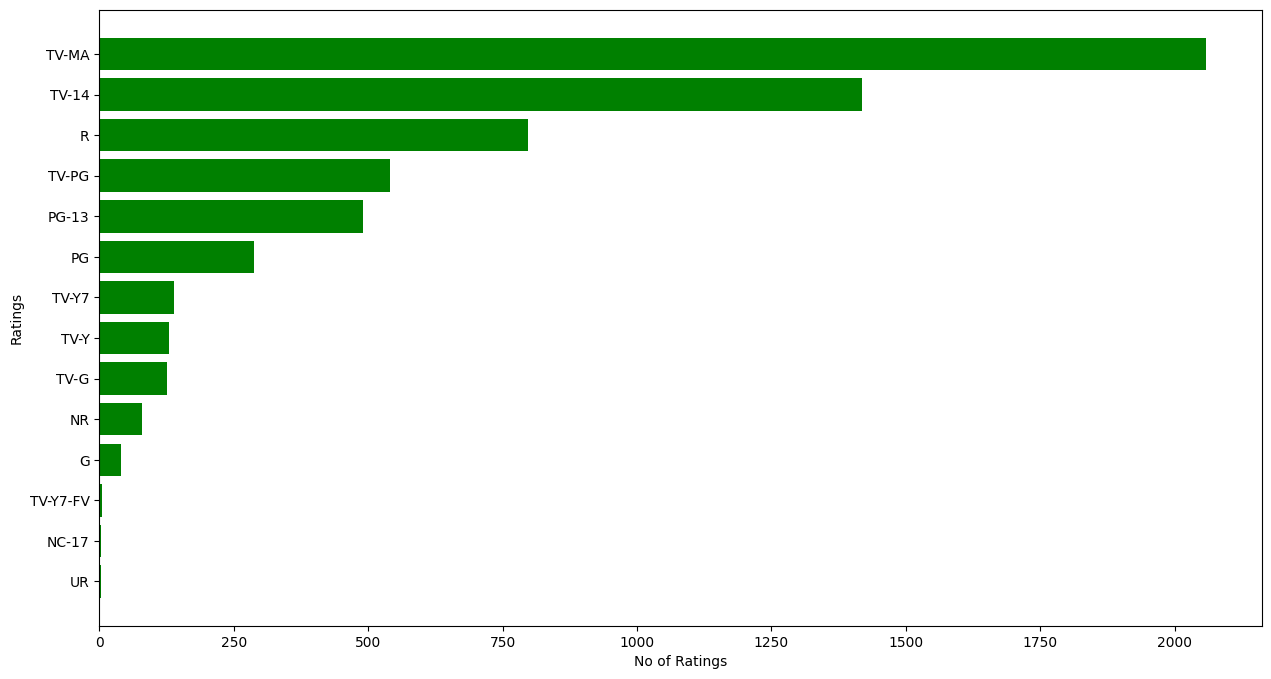

In [58]:
df_rating = df_movies.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'],df_rating[::-1]['title'], color=['green'])
plt.xlabel('No of Ratings')
plt.ylabel('Ratings')
plt.show()

Matured content, 14, R rated movies are having the more viewing and ratings across the Netflix

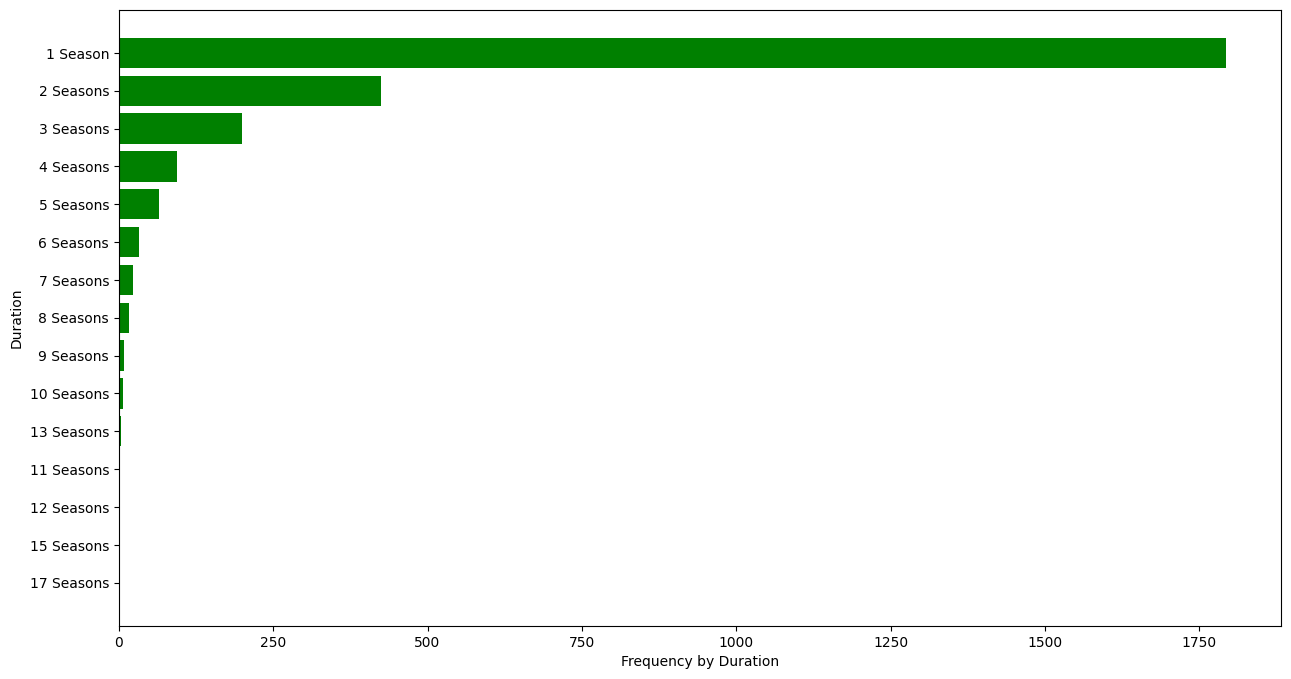

In [59]:
df_duration_copy = df_shows.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(15,8))
plt.barh(df_duration_copy[::-1]['duration'],df_duration_copy[::-1]['title'], color=['green'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across TV Shows, shows having only 1 Season are common as soon as the season length increases, the number of shows decrease and this definitely sounds as expected

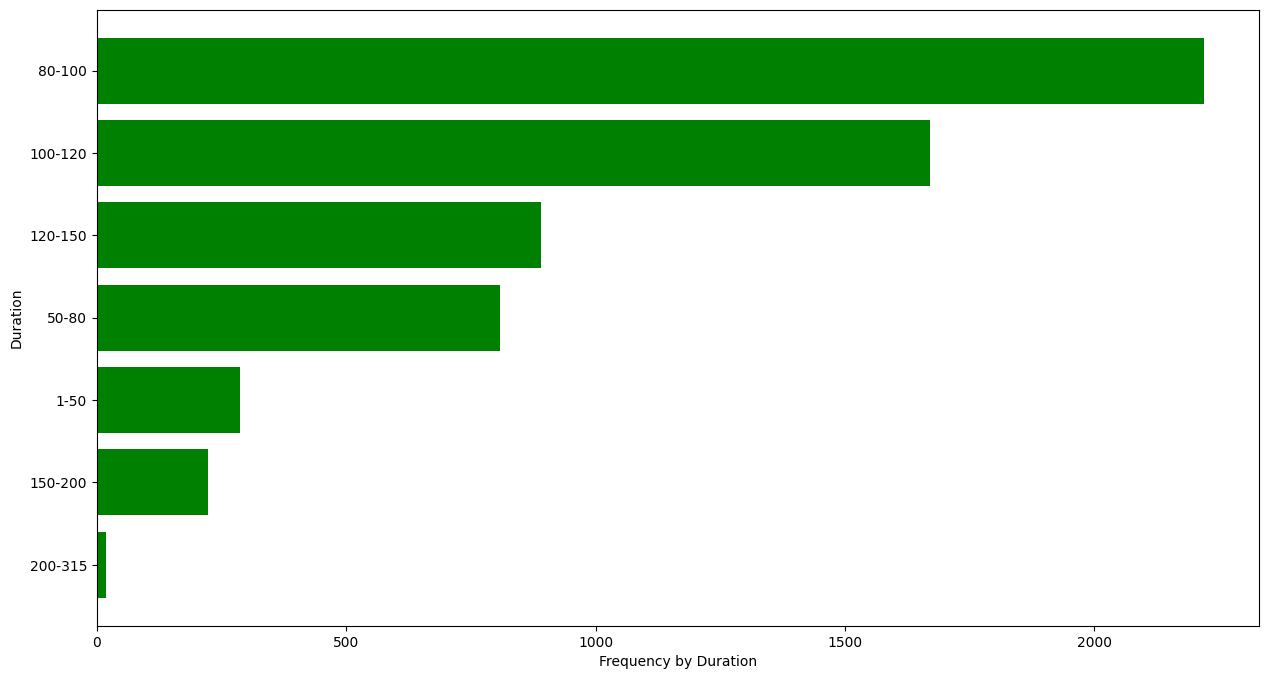

In [60]:
df_duration_copy = df_movies.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(15,8))
plt.barh(df_duration_copy[::-1]['duration'],df_duration_copy[::-1]['title'], color=['green'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across movies 80-100,100-120 and 120-150 is the ranges of minutes for which most movies lie. So quite possibly 80-150 mins is the sweet spot we would be wanting for movies.

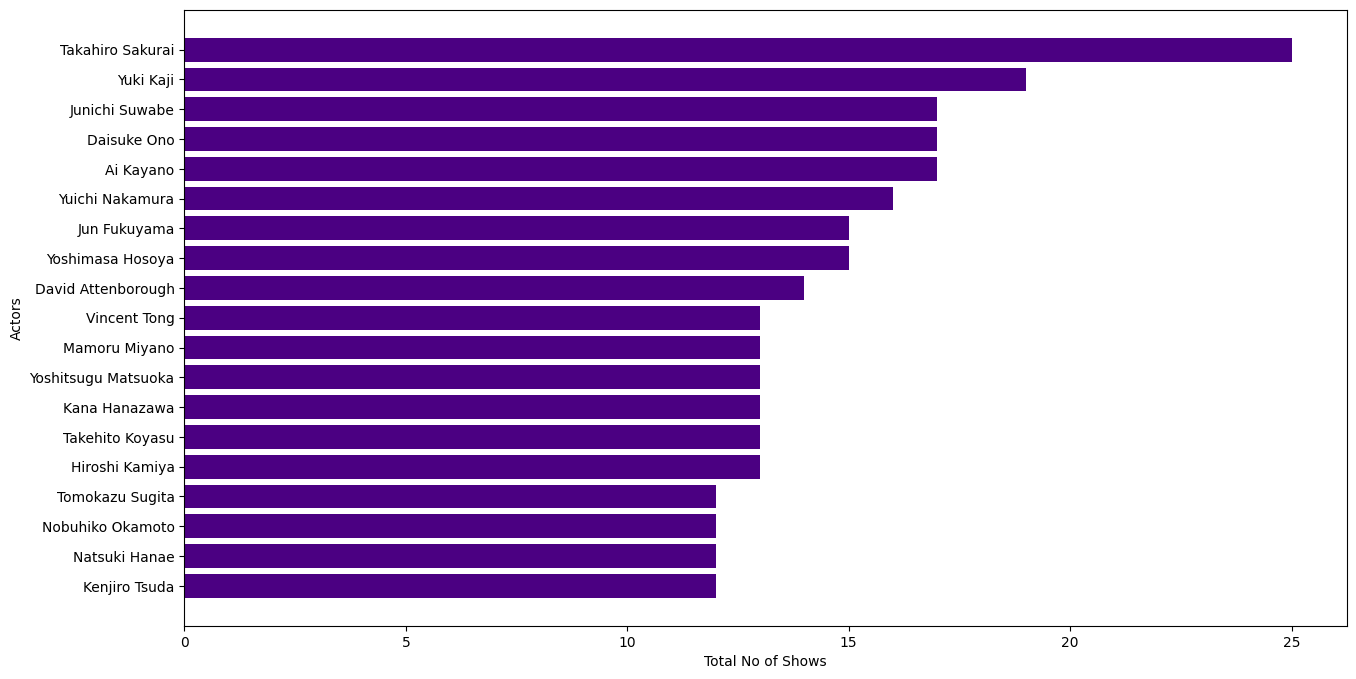

In [61]:
df_actors = df_shows.groupby(['Actors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:20]
df_actors=df_actors[df_actors['Actors'] != 'Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'],df_actors[::-1]['title'], color=['Indigo'])
plt.xlabel('Total No of Shows')
plt.ylabel('Actors')
plt.show()

Takahiro Sakurai,Yuki Kaji and other South Korean/Japanese actors are the most popular actors across TV Shows

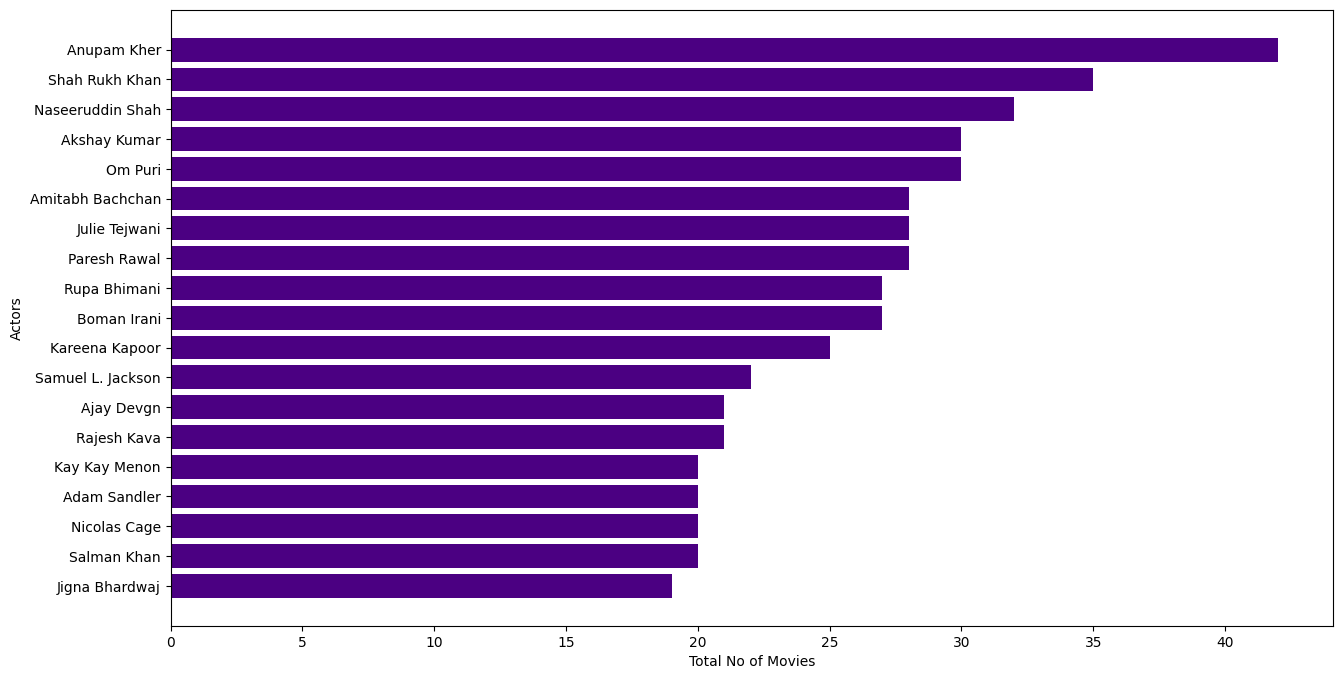

In [62]:
df_actors = df_movies.groupby(['Actors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:20]
df_actors=df_actors[df_actors['Actors'] != 'Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'],df_actors[::-1]['title'], color=['Indigo'])
plt.xlabel('Total No of Movies')
plt.ylabel('Actors')
plt.show()

Our bollywood actors such as Anupam Kher, SRK, Naseeruddin Shah are very much popular acrossmovies on Netflix

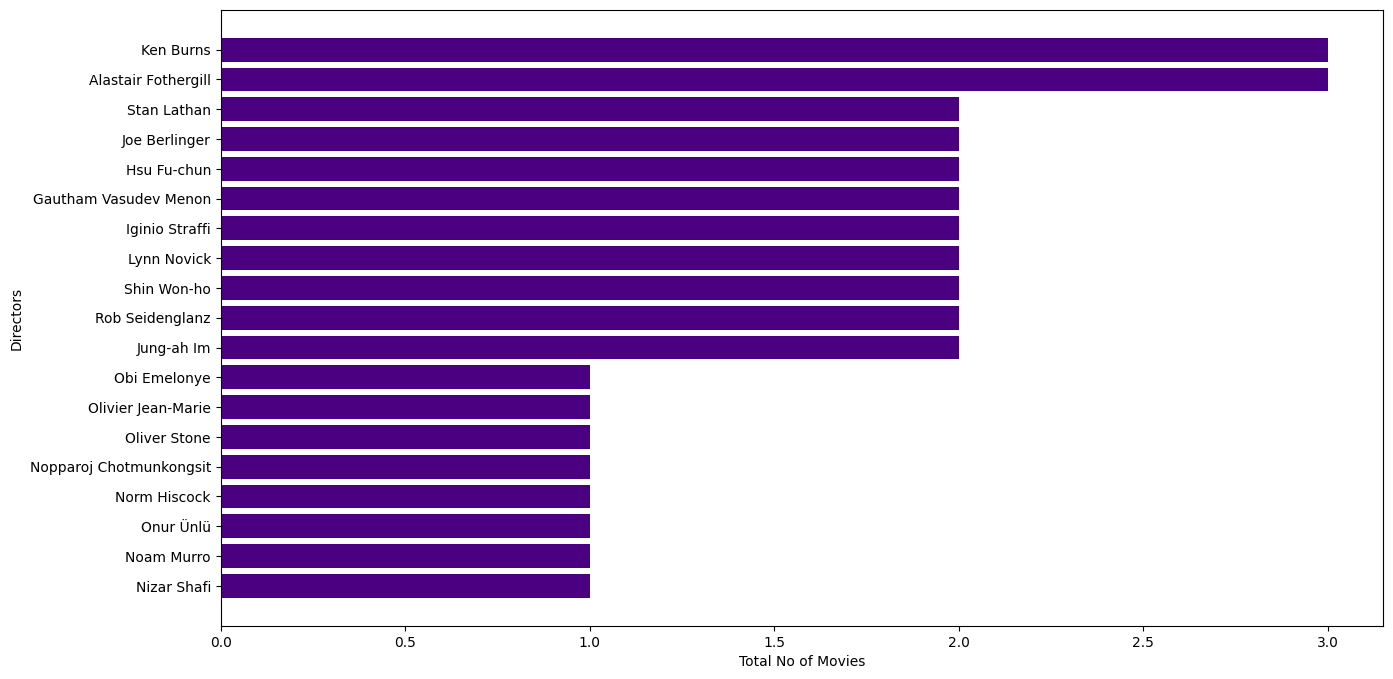

In [63]:
df_directors = df_shows.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:20]
df_directors=df_directors[df_directors['Directors'] != 'Unknown Directors']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'],df_directors[::-1]['title'], color=['Indigo'])
plt.xlabel('Total No of Movies')
plt.ylabel('Directors')
plt.show()

Ken Burns, Alastair Fothergill, Stan Lathan, Joe Barlinger are popular directors across TV Shows on Netflix

In [64]:
df_shows.head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
5,Blood & Water,Unknown Directors,Khosi Ngema,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


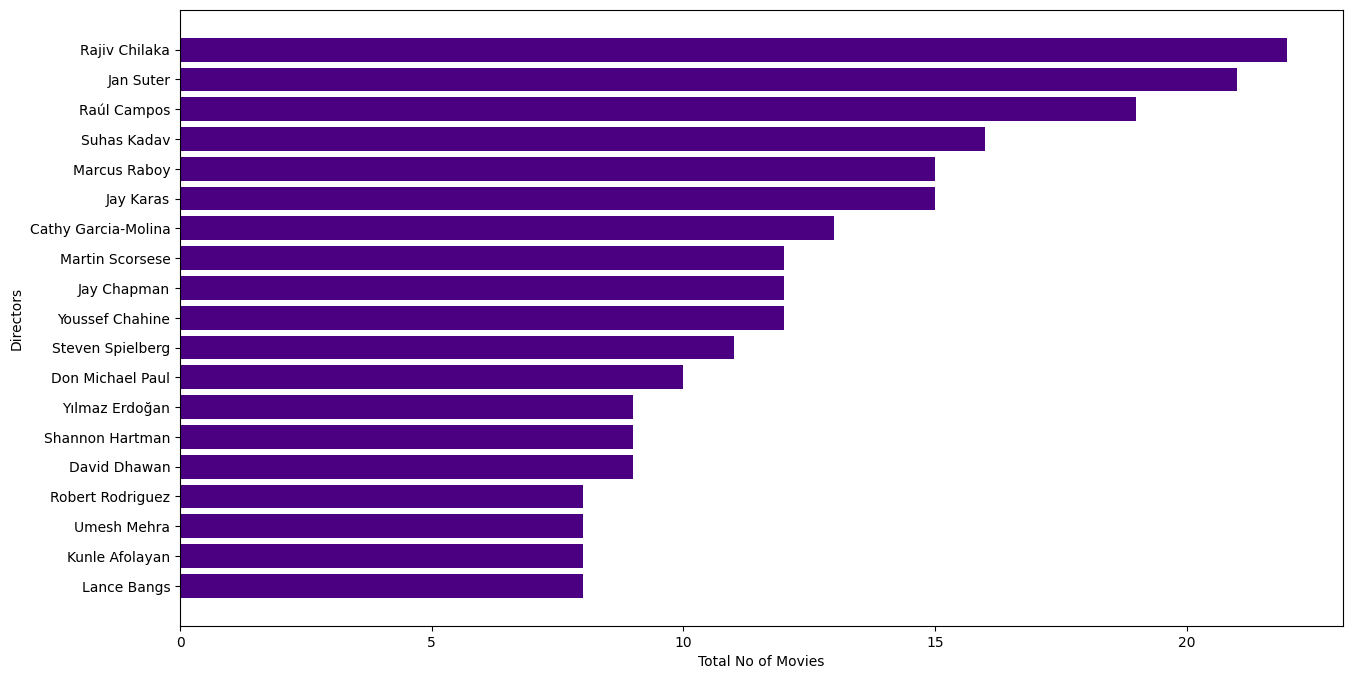

In [65]:
df_directors = df_movies.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:20]
df_directors=df_directors[df_directors['Directors'] != 'Unknown Directors']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'],df_directors[::-1]['title'], color=['Indigo'])
plt.xlabel('Total No of Movies')
plt.ylabel('Directors')
plt.show()

Rajiv Chilka, Jan Suter, Raul Campos, Suhas Kadav are popular directors across movies

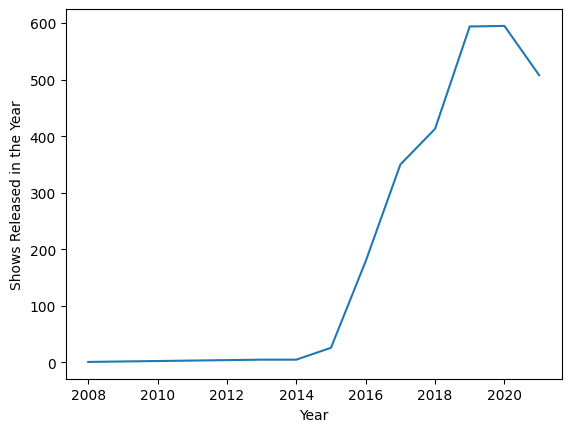

In [66]:
df_year = df_shows.groupby(['year']).agg({'title':'nunique'}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.xlabel('Year')
plt.ylabel('Shows Released in the Year')
plt.show()

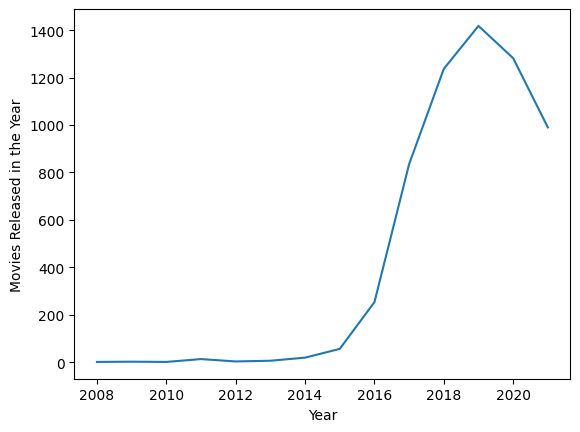

In [67]:
df_year = df_movies.groupby(['year']).agg({'title':'nunique'}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.xlabel('Year')
plt.ylabel('Movies Released in the Year')
plt.show()

Till 2019, overall content across Netflix was increasing but due to Covid in 2020, though TV Shows didn't take a hit then Movies did take a hit. Well later in 2021, content across both was reduced significantly

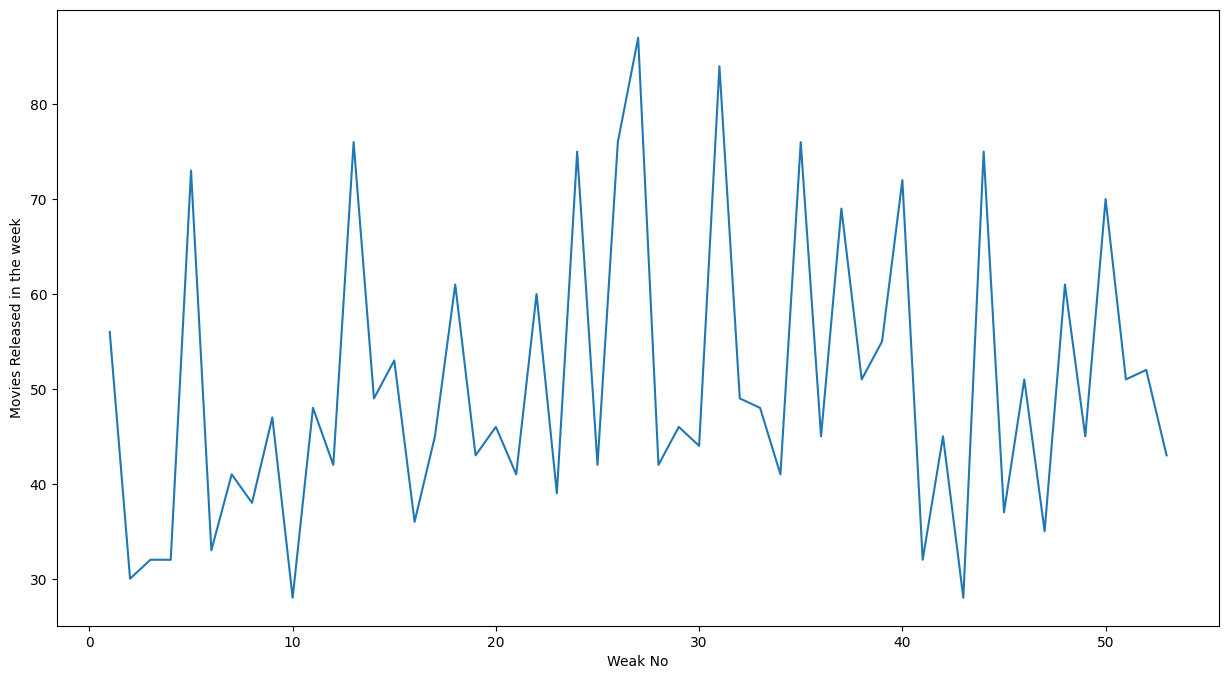

In [68]:
df_week = df_shows.groupby(['week_Added']).agg({'title':'nunique'}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.xlabel('Weak No')
plt.ylabel('Movies Released in the week')
plt.show()

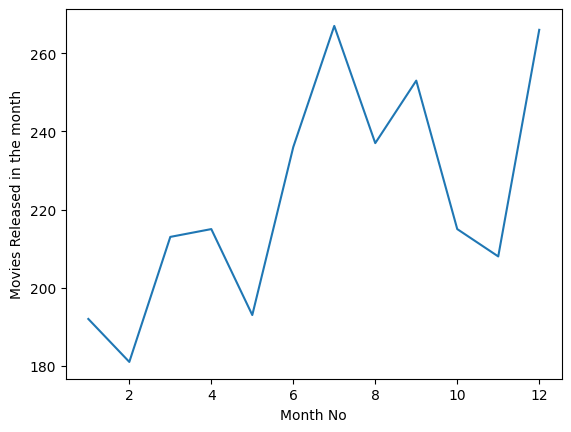

In [69]:
df_month = df_shows.groupby(['month_added']).agg({'title':'nunique'}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.xlabel('Month No')
plt.ylabel('Movies Released in the month')
plt.show()

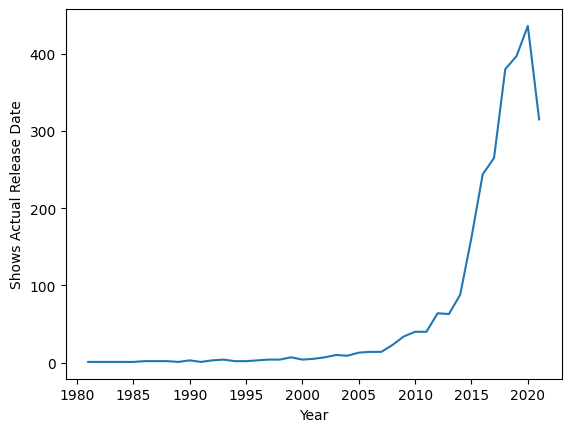

In [70]:
df_release_year=df_shows[df_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Shows Actual Release Date")
plt.xlabel("Year")
plt.show()

TV Shows are added in Netflix by a tremendous amount in mid weeks/months of the year, i.e- July
Movies are added in Netflix by a tremendous amount in first week/last month of current year and first month of next year

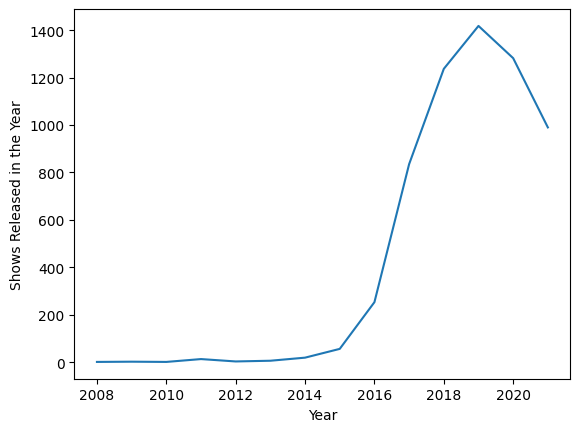

In [71]:
df_year = df_movies.groupby(['year']).agg({'title':'nunique'}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.xlabel('Year')
plt.ylabel('Shows Released in the Year')
plt.show()

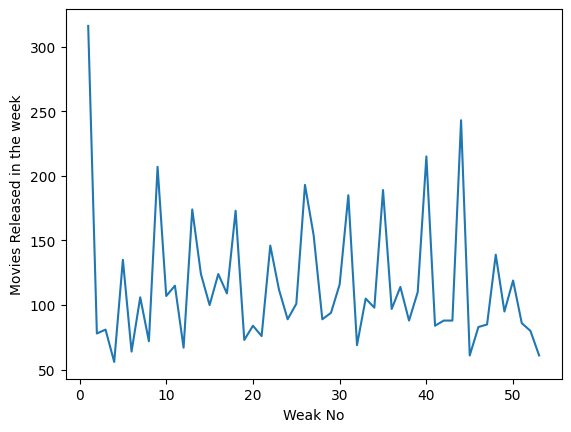

In [72]:
df_week = df_movies.groupby(['week_Added']).agg({'title':'nunique'}).reset_index()
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.xlabel('Weak No')
plt.ylabel('Movies Released in the week')
plt.show()

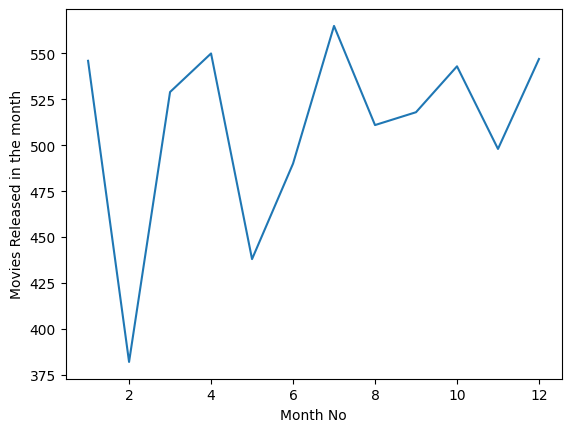

In [73]:
df_month = df_movies.groupby(['month_added']).agg({'title':'nunique'}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.xlabel('Month No')
plt.ylabel('Movies Released in the month')
plt.show()

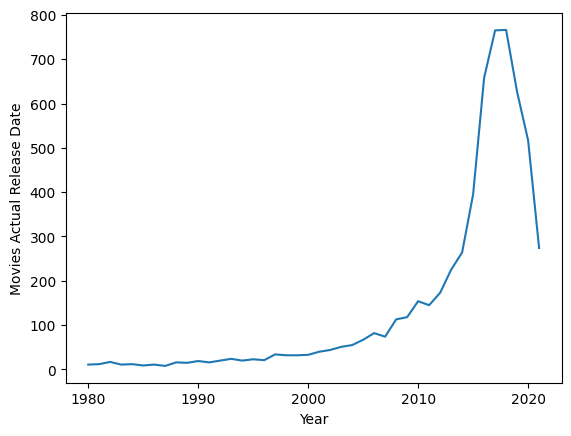

In [74]:
df_release_year=df_movies[df_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

Actual Releases of both TV Shows and Movies have taken a hit after 2020

### Univariate Analysis for Movies and TV shows in United States

In [75]:
df_final1.head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


In [76]:
df_usa_shows=df_final1[df_final1['Country']=='United States'][df_final1[df_final1['Country']=='United States']['type']=='TV Show']
df_usa_movies=df_final1[df_final1['Country']=='United States'][df_final1[df_final1['Country']=='United States']['type']=='Movie']

In [77]:
df_usa_movies

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
179,Sankofa,Haile Gerima,Kofi Ghanaba,Dramas,United States,s8,Movie,"September 24, 2021",1993,TV-MA,120-150,2021-09-24,9,38,2021
185,Sankofa,Haile Gerima,Kofi Ghanaba,Independent Movies,United States,s8,Movie,"September 24, 2021",1993,TV-MA,120-150,2021-09-24,9,38,2021
191,Sankofa,Haile Gerima,Kofi Ghanaba,International Movies,United States,s8,Movie,"September 24, 2021",1993,TV-MA,120-150,2021-09-24,9,38,2021
197,Sankofa,Haile Gerima,Oyafunmike Ogunlano,Dramas,United States,s8,Movie,"September 24, 2021",1993,TV-MA,120-150,2021-09-24,9,38,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201962,Zoom,Peter Hewitt,Spencer Breslin,Comedies,United States,s8806,Movie,"January 11, 2020",2006,PG,80-100,2020-01-11,1,2,2020
201963,Zoom,Peter Hewitt,Rip Torn,Children & Family Movies,United States,s8806,Movie,"January 11, 2020",2006,PG,80-100,2020-01-11,1,2,2020
201964,Zoom,Peter Hewitt,Rip Torn,Comedies,United States,s8806,Movie,"January 11, 2020",2006,PG,80-100,2020-01-11,1,2,2020
201965,Zoom,Peter Hewitt,Kevin Zegers,Children & Family Movies,United States,s8806,Movie,"January 11, 2020",2006,PG,80-100,2020-01-11,1,2,2020


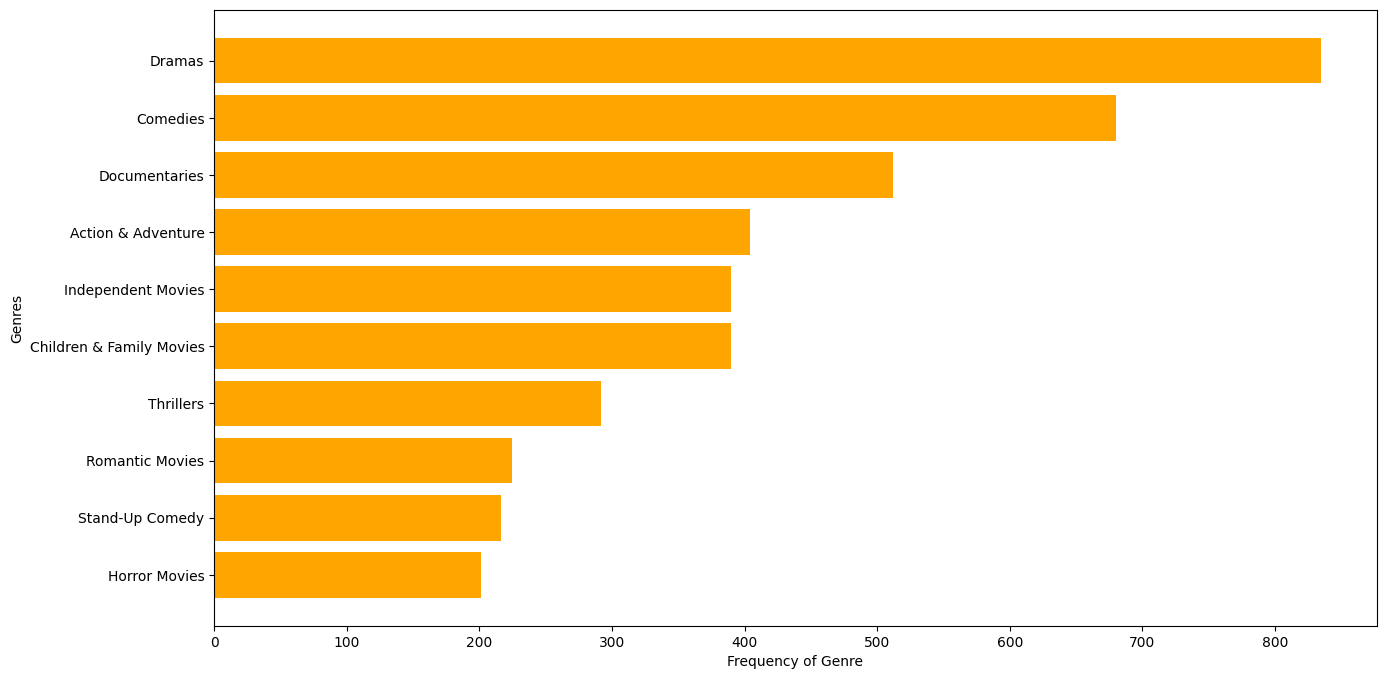

In [78]:
df_genre = df_usa_movies.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'],df_genre[::-1]['title'], color=['orange'])
plt.xlabel('Frequency of Genre')
plt.ylabel('Genres')
plt.show()

Dramas,Comedy, Kids 'TV Shows, International TV Shows and Docuseries, Genres are popular in TV Series in USA

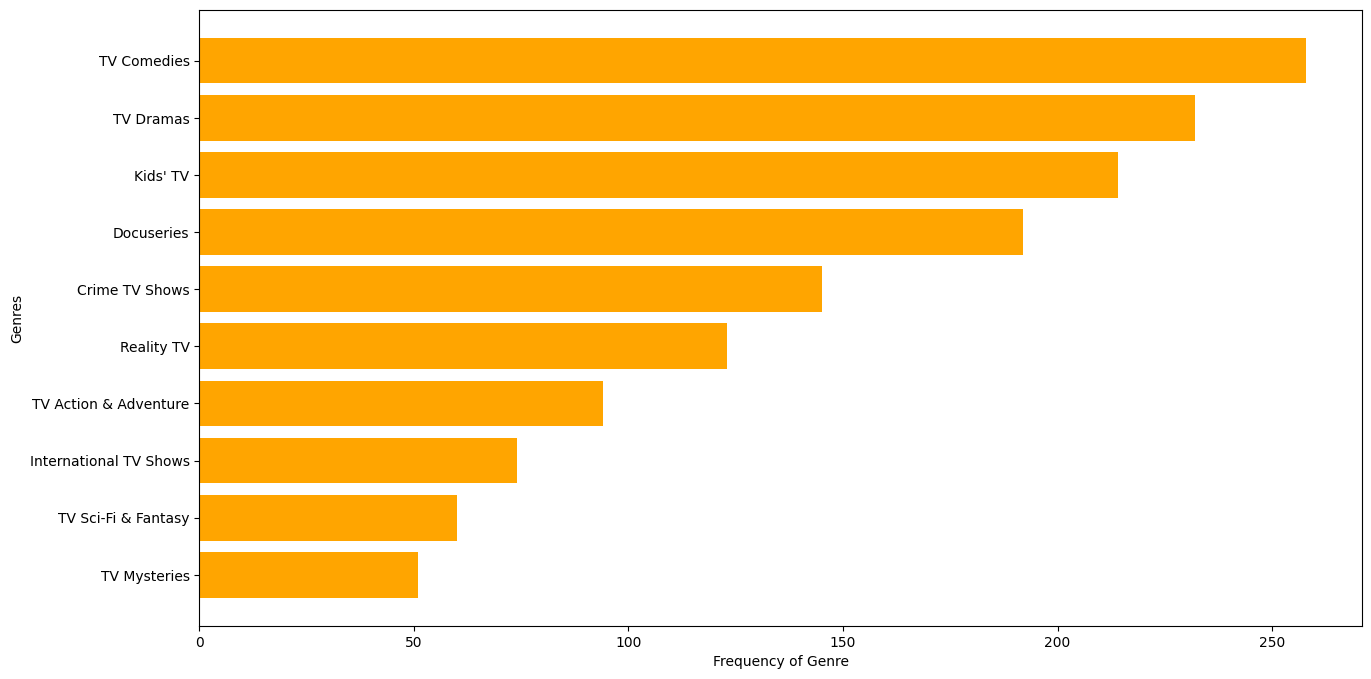

In [79]:
df_genre = df_usa_shows.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'],df_genre[::-1]['title'], color=['orange'])
plt.xlabel('Frequency of Genre')
plt.ylabel('Genres')
plt.show()

Dramas,Comedy, Kids 'TV Shows, International TV Shows and Docuseries, Genres are popular in TV Series in USA

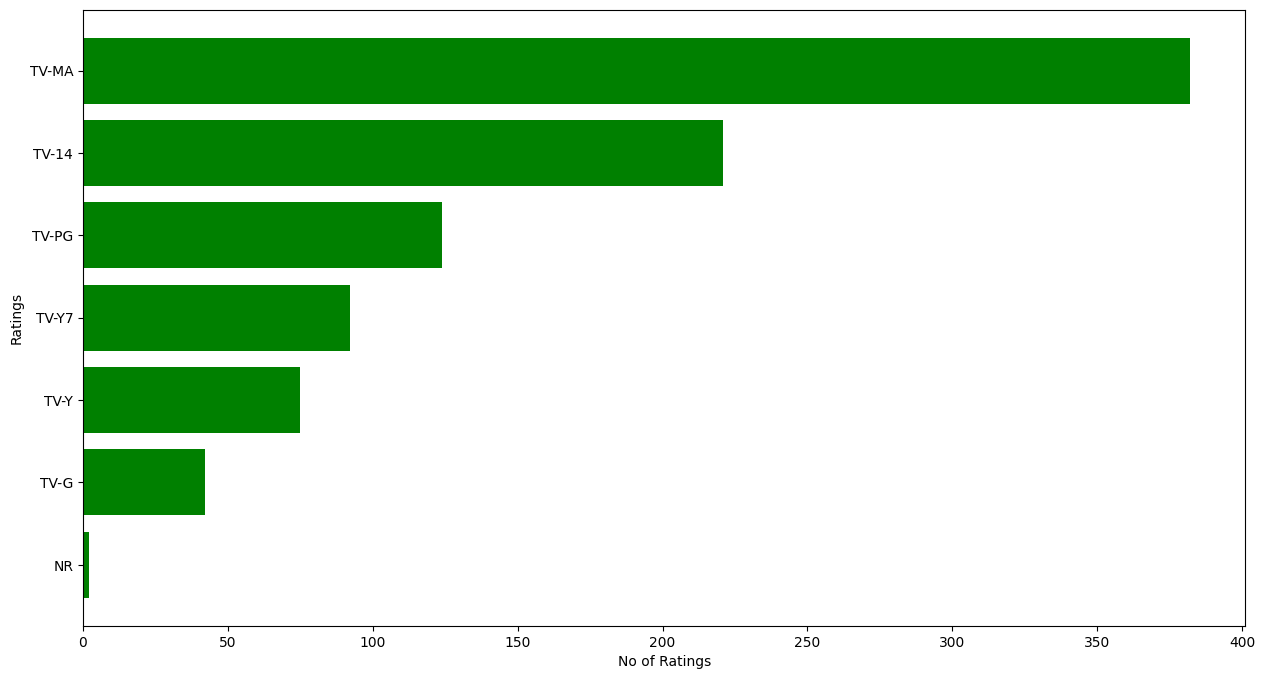

In [80]:
df_rating = df_usa_shows.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'],df_rating[::-1]['title'], color=['green'])
plt.xlabel('No of Ratings')
plt.ylabel('Ratings')
plt.show()

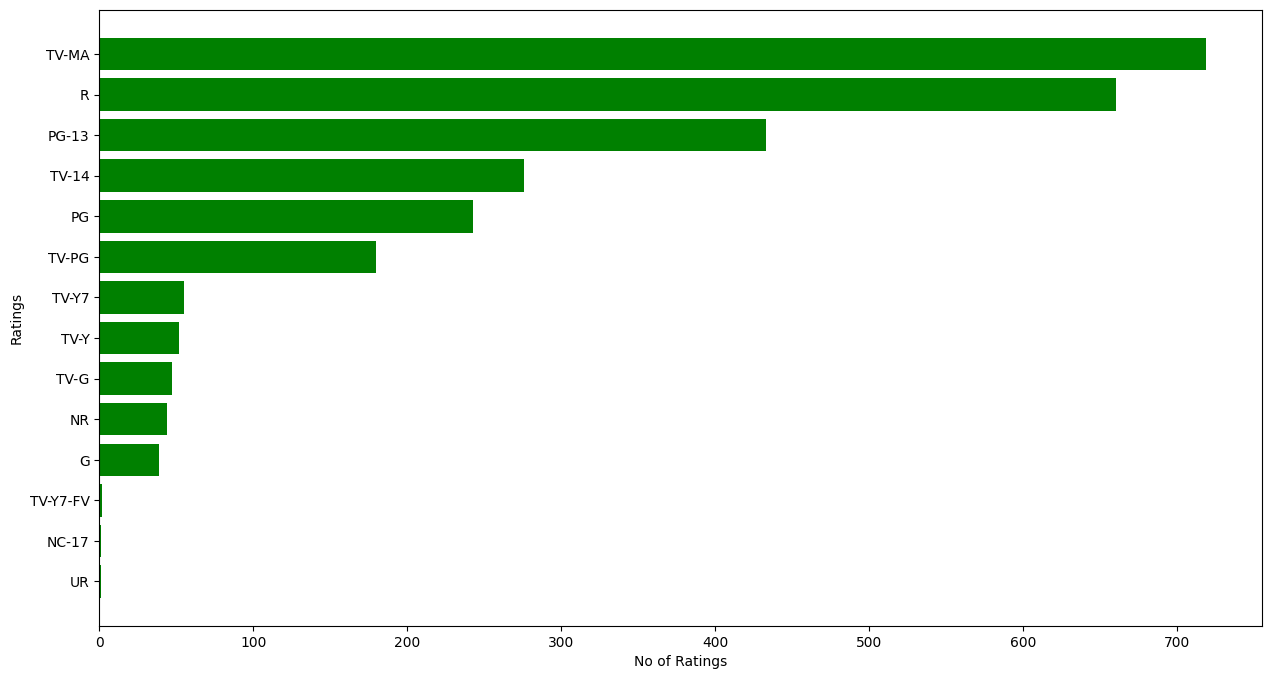

In [81]:
df_rating = df_usa_movies.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'],df_rating[::-1]['title'], color=['green'])
plt.xlabel('No of Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes Mature Audiences and those appropriate for over 14/over 17 ages in both Movies and TV Shows in USA

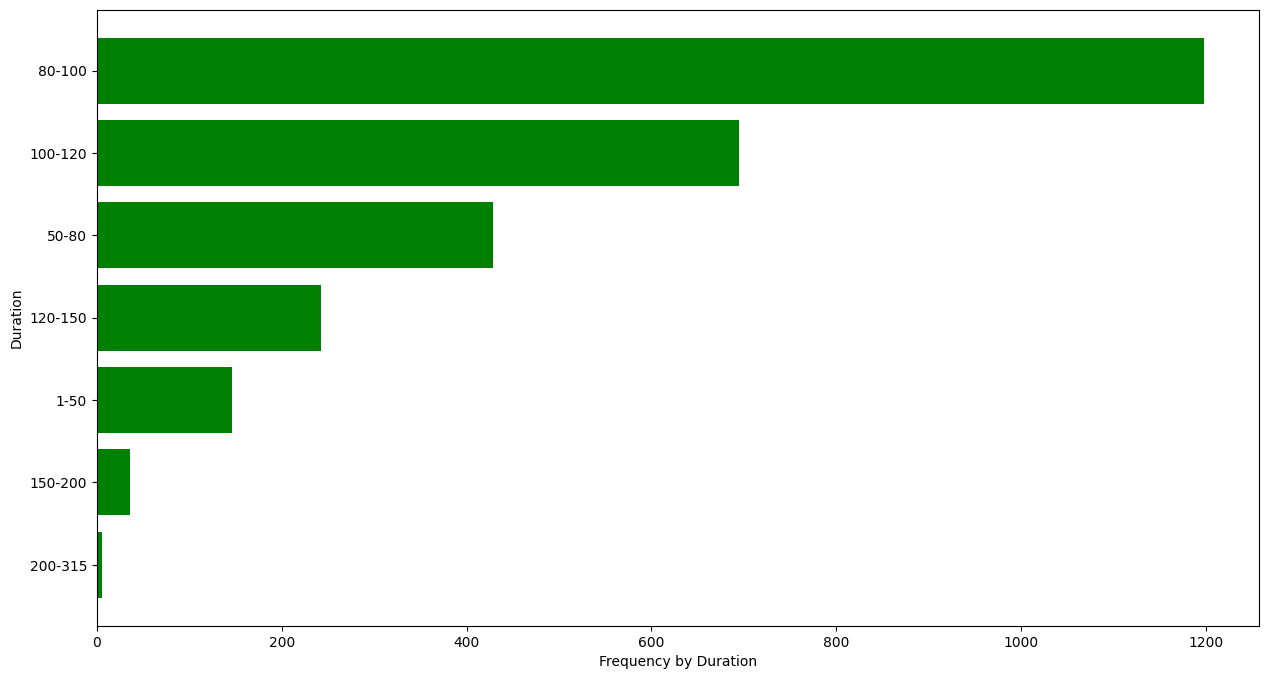

In [82]:
df_duration_copy = df_usa_movies.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(15,8))
plt.barh(df_duration_copy[::-1]['duration'],df_duration_copy[::-1]['title'], color=['green'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across movies 80-100,100-120 is the ranges of minutes for which most movies lie. So quite possibly 80-120 mins is the sweet spot we would be wanting for movies in USA

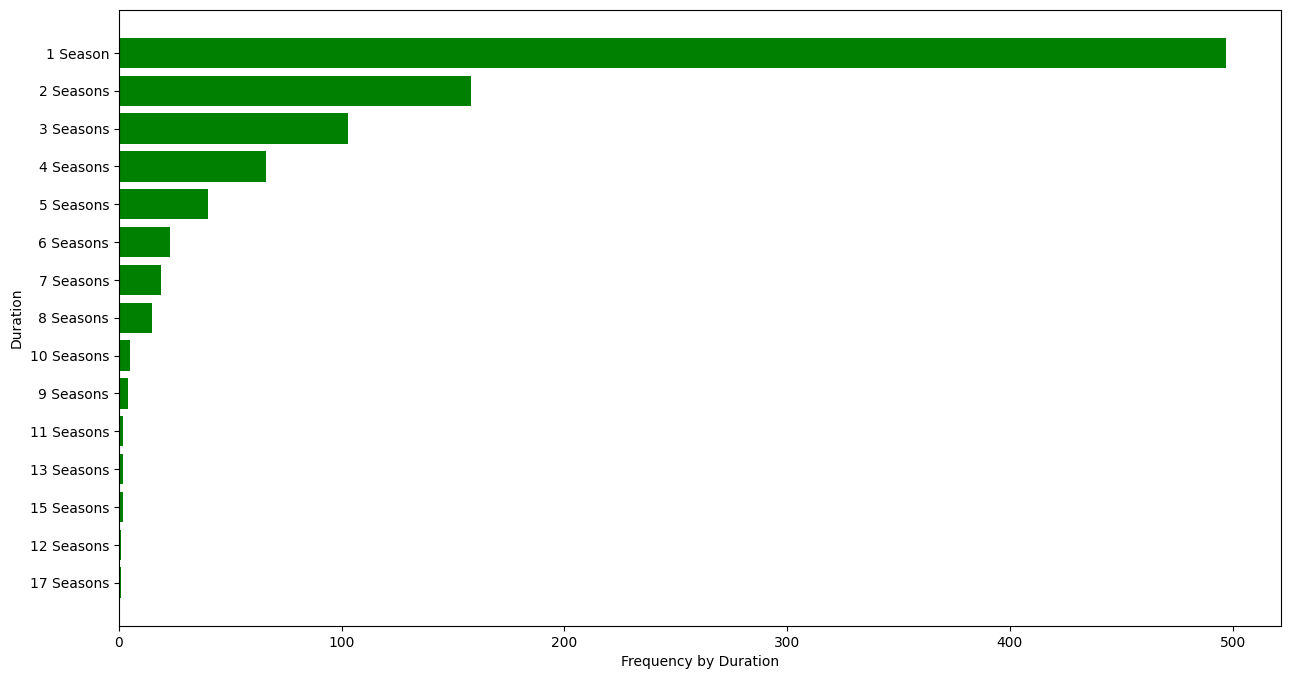

In [83]:
df_duration_copy = df_usa_shows.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(15,8))
plt.barh(df_duration_copy[::-1]['duration'],df_duration_copy[::-1]['title'], color=['green'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across shows 1 season, 2 season, 3 season series are more wanting in USA

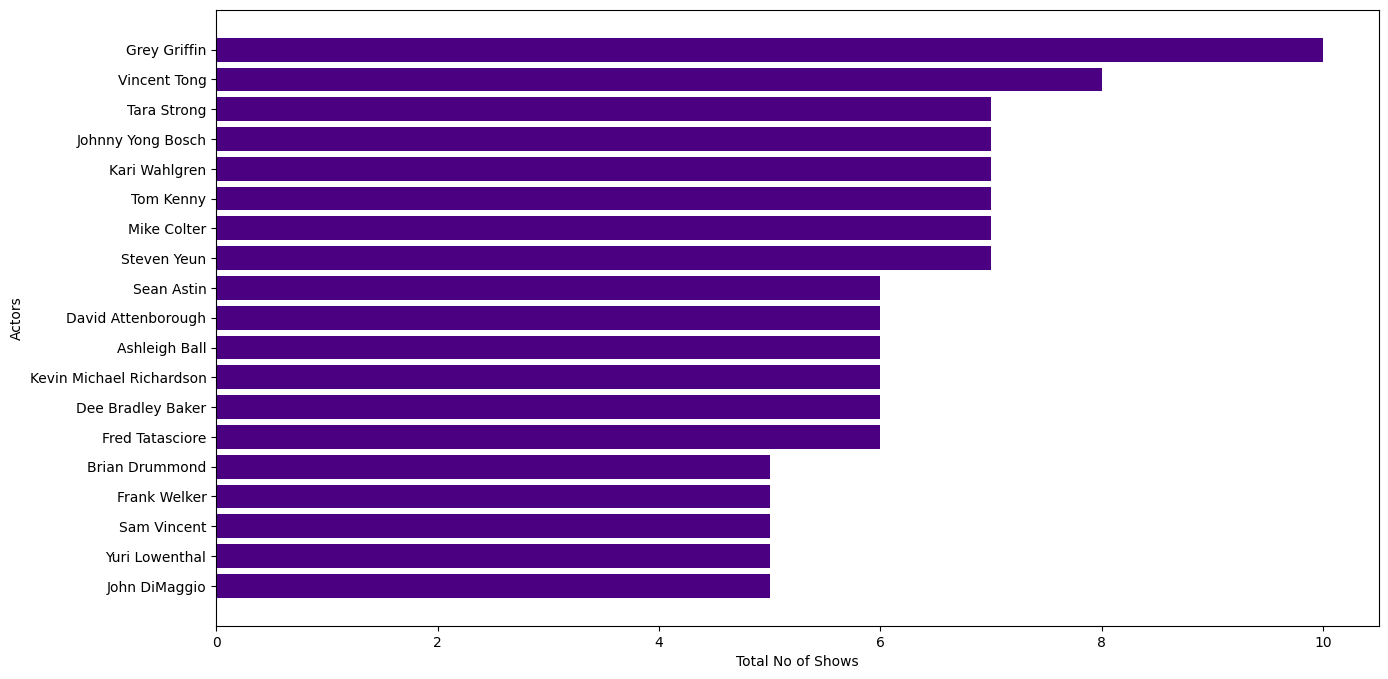

In [84]:
df_actors = df_usa_shows.groupby(['Actors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:20]
df_actors=df_actors[df_actors['Actors'] != 'Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'],df_actors[::-1]['title'], color=['Indigo'])
plt.xlabel('Total No of Shows')
plt.ylabel('Actors')
plt.show()

Vincent Tong,Grey Griffin and Kevin Richardson are the most popular actors across TV Shows in USA

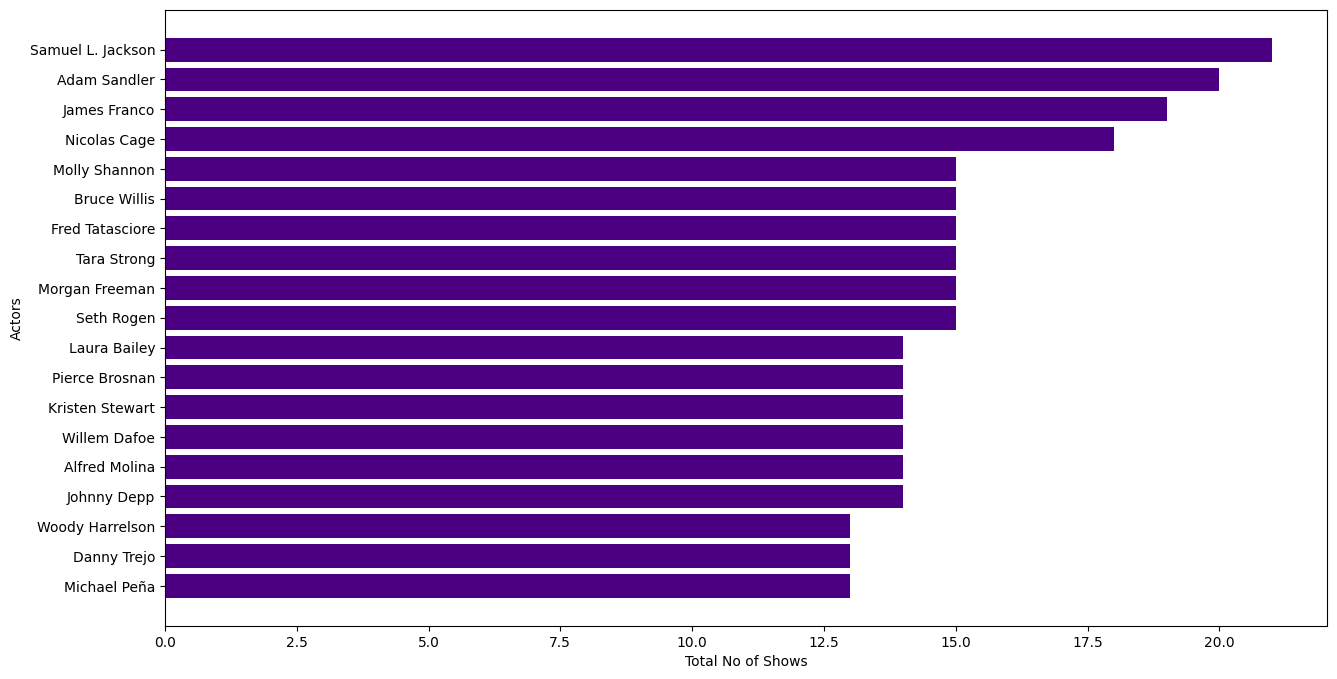

In [85]:
df_actors = df_usa_movies.groupby(['Actors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:20]
df_actors=df_actors[df_actors['Actors'] != 'Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'],df_actors[::-1]['title'], color=['Indigo'])
plt.xlabel('Total No of Shows')
plt.ylabel('Actors')
plt.show()

Samuel Jackson,Adam Sandler,James Franco and Nicolas Cage are very much popular across movies on Netflix in USA

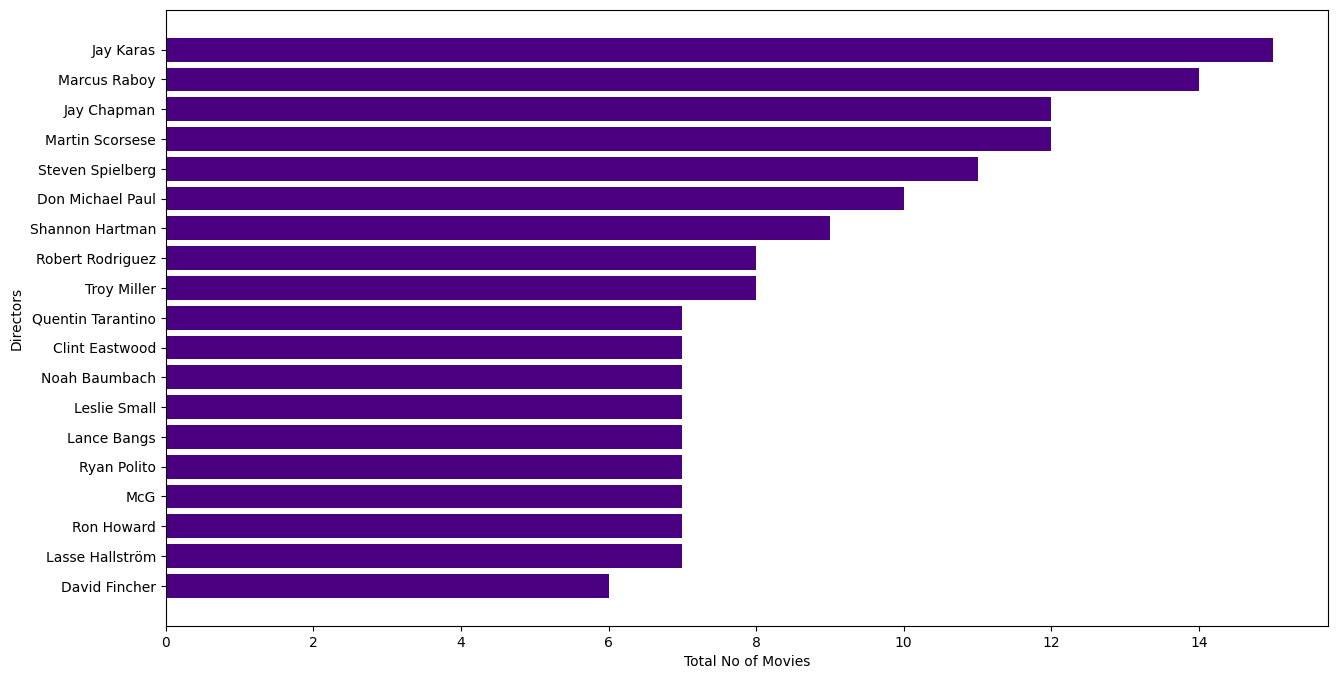

In [86]:
df_directors = df_usa_movies.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:20]
df_directors=df_directors[df_directors['Directors'] != 'Unknown Directors']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'],df_directors[::-1]['title'], color=['Indigo'])
plt.xlabel('Total No of Movies')
plt.ylabel('Directors')
plt.show()

Jay Karas,Marcus Raboy,Martin Scorcese and Jay Chapman are popular directors across movies in USA

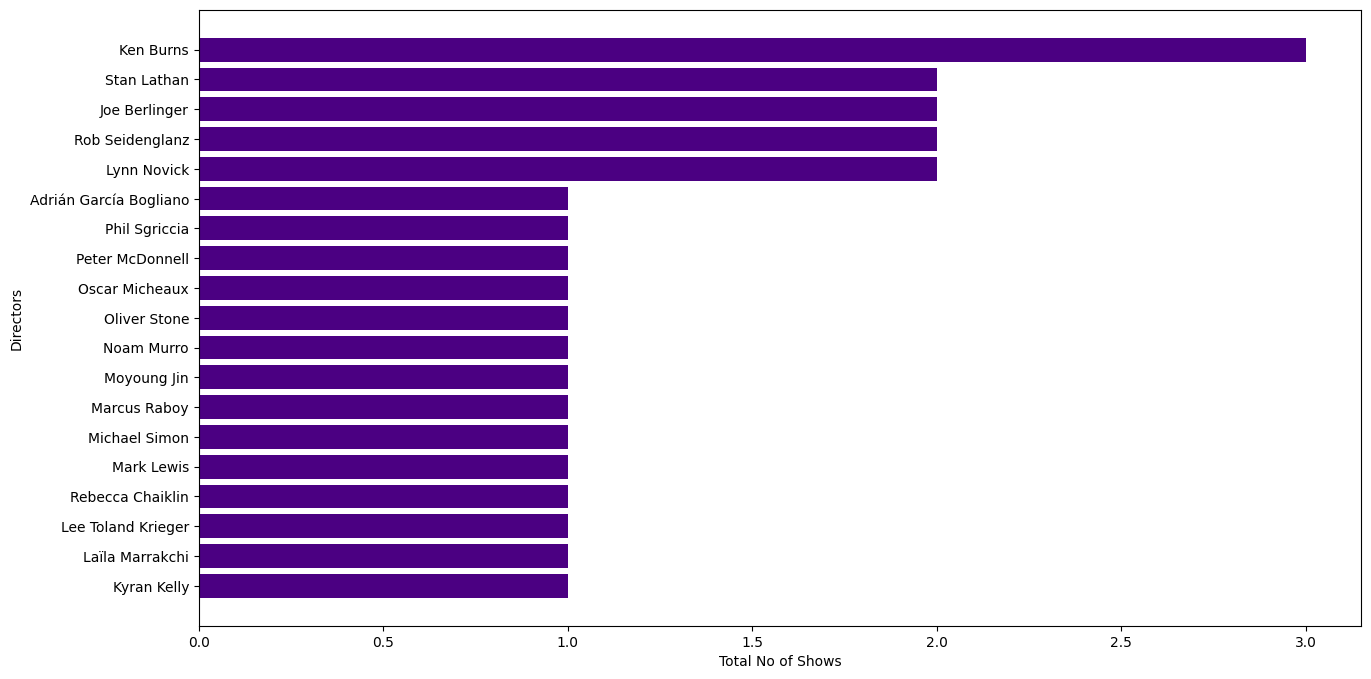

In [87]:
df_directors = df_usa_shows.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:20]
df_directors=df_directors[df_directors['Directors'] != 'Unknown Directors']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'],df_directors[::-1]['title'], color=['Indigo'])
plt.xlabel('Total No of Shows')
plt.ylabel('Directors')
plt.show()

Ken Burns,Stan Lathan, Joe Barlinger are popular directors across TV Shows on Netflix in USA

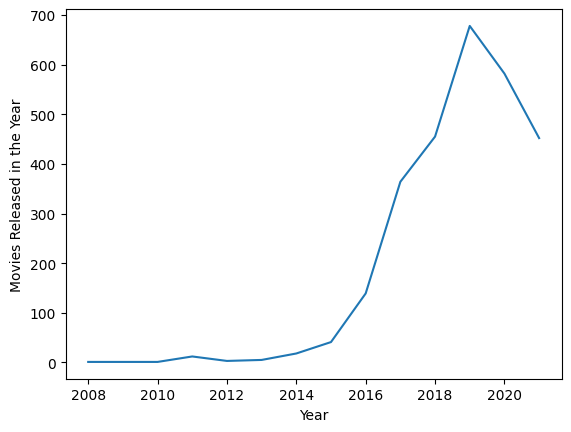

In [88]:
df_year=df_usa_movies.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

In USA, number of movies remained the same in 2021 as they were in 2020 while number of movies declined

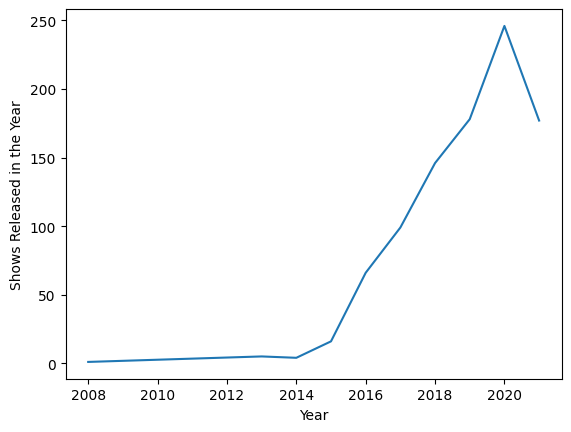

In [89]:
df_year=df_usa_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

In USA, number of movies remained the same in 2021 as they were in 2020 while number of movies declined:

## Recommendations

1. It is recommended to create content in the genres of Drama, Comedy and International TV Shows/Movies, as they are the most popular across countries and in both TV Shows and Movies.

2. To schedule TV Shows in July/August and Movies in the last week of the year/first month of the next year is recommended.

3. For audiences in the USA, it is recommended to create movies with a length of 80-120 minutes, and also to consider creating Kids TV Shows in addition to the genres mentioned in point 1.

4. For audiences in the UK, it is recommended to create movies with the same length as for USA audiences (80-120 minutes).

5. It is recommended to target audiences in the USA and India who are 14+ and above for ratings, while for the UK, it is recommended to create completely mature/R-rated content.

6. Adding movies for Indian audiences is recommended as the interest has been declining since 2018.

In [90]:
print('Peace Out')

Peace Out
